<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</center></font>
<center><font size=6>Introduction to Neural Networks - Cars4u</center></font>

<center><img src="https://images.pexels.com/photos/164634/pexels-photo-164634.jpeg" width="720"></center>

<center><font size=6> Used Car Price Prediction </font></center>

## Problem Statement

### Business Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.


### Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.


### Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

- Brand: brand name of the car
- Model Name: model name of the car
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner_Type: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs

## Installing and Importing necessary libraries

In [1]:
#Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.24.1 pandas==1.5.3 -q --user --no-warn-script-location

Note: After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import time

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [3]:
# uncomment and run the following lines in case Google Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# loading the dataset
data = pd.read_csv("used_cars_data.csv")

## Data Overview

### Displaying the first few rows of the dataset

In [6]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,5.51,1.75,26.60,998.0,58.16,maruti,wagon
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,16.06,12.50,19.67,1582.0,126.20,hyundai,creta
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,8.61,4.50,18.20,1199.0,88.70,honda,jazz
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,11.27,6.00,20.77,1248.0,88.76,maruti,ertiga
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,audi,a4


### Checking the shape of the dataset

In [7]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7252 rows and 14 columns.


### Checking 10 random rows of the dataset

In [8]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
2397,Kolkata,2016,21460.0,Petrol,Manual,First,5.0,9.470,6.00,17.00,1497.0,121.36,ford,ecosport
6218,Kolkata,2013,48000.0,Diesel,Manual,First,5.0,7.880,NaN,23.40,1248.0,74.00,maruti,swift
6737,Mumbai,2015,59500.0,Petrol,Manual,First,7.0,13.580,NaN,17.30,1497.0,117.30,honda,mobilio
3659,Delhi,2015,27000.0,Petrol,Automatic,First,5.0,9.600,5.95,19.00,1199.0,88.70,honda,jazz
4513,Bangalore,2015,19000.0,Diesel,Automatic,Second,5.0,69.675,38.00,16.36,2179.0,187.70,jaguar,xf
599,Coimbatore,2019,40674.0,Diesel,Automatic,First,7.0,28.050,24.82,11.36,2755.0,171.50,toyota,innova
186,Bangalore,2014,37382.0,Diesel,Automatic,First,5.0,86.970,32.00,13.00,2143.0,201.10,mercedes-benz,e-class
305,Kochi,2014,61726.0,Diesel,Automatic,First,5.0,67.100,20.77,17.68,1968.0,174.33,audi,a6
4581,Hyderabad,2013,105000.0,Diesel,Automatic,First,5.0,44.800,19.00,17.32,1968.0,150.00,audi,q3
6616,Delhi,2014,55000.0,Diesel,Automatic,First,5.0,49.490,NaN,11.78,2143.0,167.62,mercedes-benz,new


**Observations**


In [9]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [10]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7251 non-null   float64
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Seats              7199 non-null   float64
 7   New_Price          7252 non-null   float64
 8   Price              6019 non-null   float64
 9   mileage_num        7169 non-null   float64
 10  engine_num         7206 non-null   float64
 11  power_num          7077 non-null   float64
 12  Brand              7252 non-null   object 
 13  Model              7252 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 793.3+ KB


**Observations**

- 6 columns are of the *object* type columns and 7 columns are of *numerical* type columns


### Checking for duplicate values

In [11]:
# checking for duplicate values
df.duplicated().sum()

2

- There are two duplicate value in the data.
- Let's take a closer look at it.

In [12]:
df[df.duplicated(keep=False) == True]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
3623,Hyderabad,2007,52195.0,Petrol,Manual,First,5.0,4.36,1.75,19.7,796.0,46.3,maruti,alto
4781,Hyderabad,2007,52195.0,Petrol,Manual,First,5.0,4.36,1.75,19.7,796.0,46.3,maruti,alto
6940,Kolkata,2017,13000.0,Diesel,Manual,First,5.0,13.58,NaN,26.0,1498.0,98.6,honda,city
7077,Kolkata,2017,13000.0,Diesel,Manual,First,5.0,13.58,NaN,26.0,1498.0,98.6,honda,city


**Observations**

- There is a good chance that two cars of the same build were sold in the same location.
- But it is highly unlikely that both of them will have the same number of kilometers driven.
- So, we will drop the row which occurs second.

In [13]:
df.drop(4781, inplace=True)
df.drop(6940, inplace=True)

In [14]:
# checking for duplicate values
df.duplicated().sum()

0

- There are no duplicate values

### Checking for missing values

In [15]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       1
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
New_Price               0
Price                1232
mileage_num            83
engine_num             46
power_num             175
Brand                   0
Model                   0
dtype: int64

* There are missing values in Kilometers_Driven, Seats, Price, mileage_num, engine_num, power_num which can be treated in data pre-processing
* We will drop the rows where `Price` is missing as it is the target variable before splitting the data into train and test

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>


### **Note**: The EDA section has been covered in detail in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Univariate Analysis

In [18]:
# creating a copy of the dataframe
df1 = df.copy()

#### `Price`

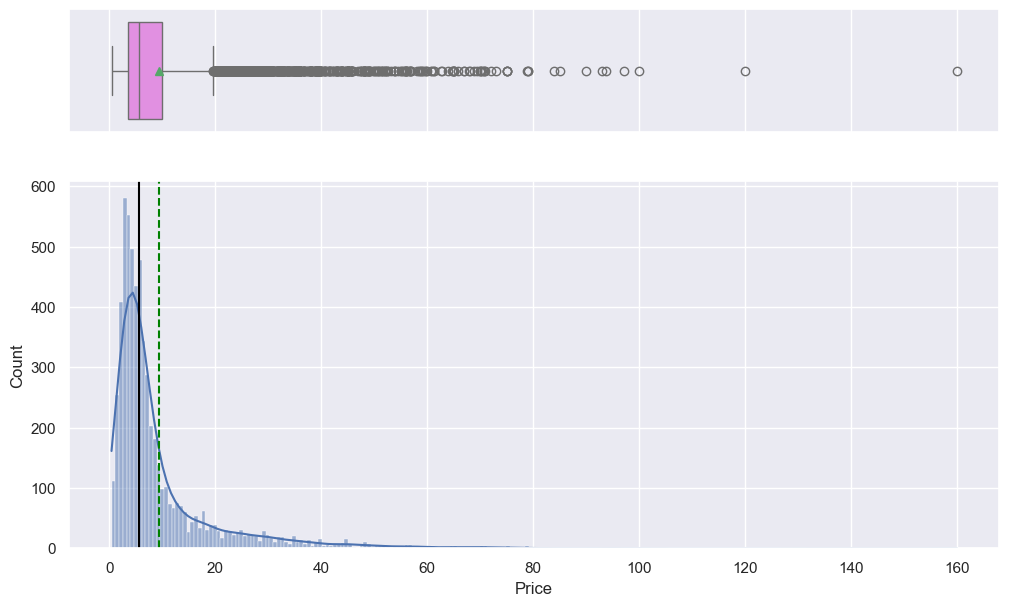

In [19]:
histogram_boxplot(df1, "Price", kde=True)

**Observations**

* This is a highly skewed distribution.


#### `New_Price`

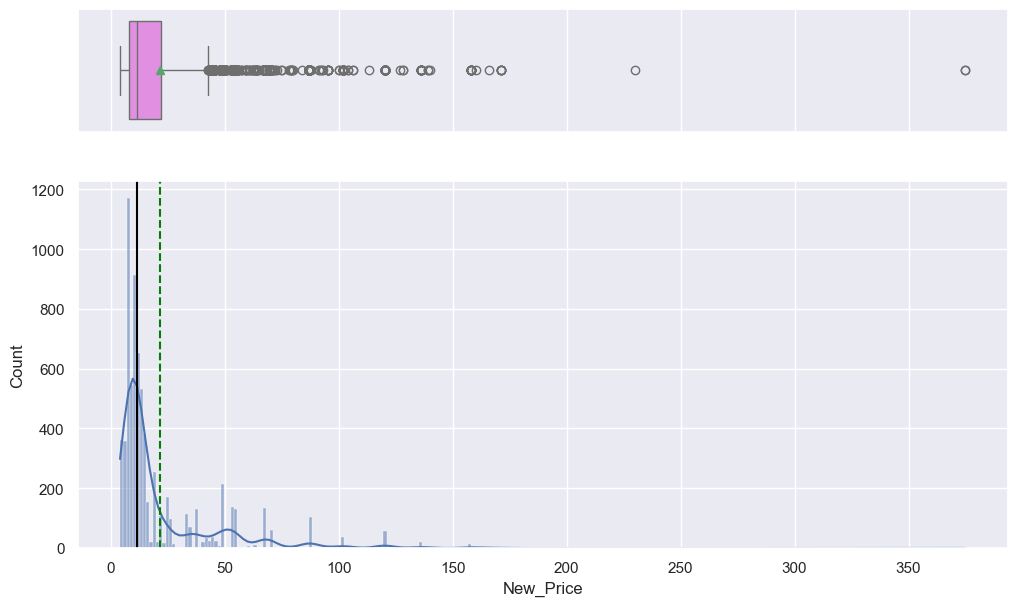

In [20]:
histogram_boxplot(df1, "New_Price", kde=True)

**Observations**

* This is another highly skewed distribution.


#### `Brand`

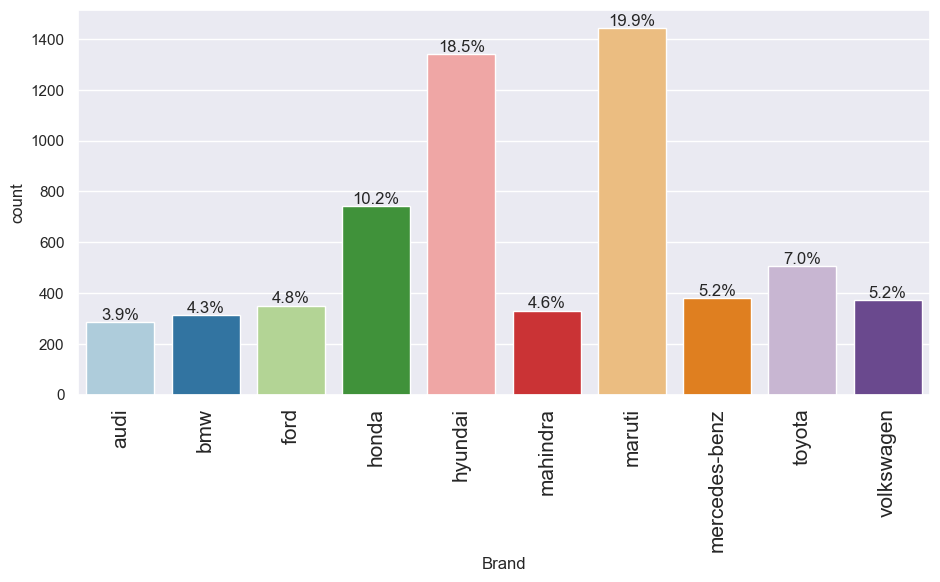

In [21]:
labeled_barplot(df1, "Brand", perc=True, n=10)

* Most of the cars in the data belong to Maruti or Hyundai. The price of used cars is lower for budget brands like Porsche, Bentley, Lamborghini, etc. The price of used cars is higher for premium brands like Maruti, Tata, Fiat, etc.

#### `Location`

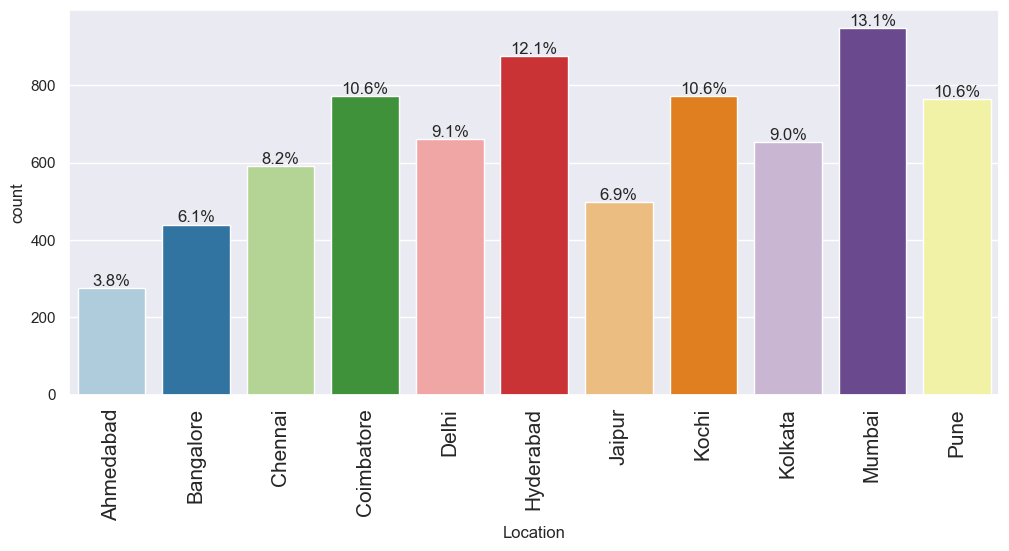

In [22]:
labeled_barplot(df1, "Location", perc=True)

* Hyderabad and Mumbai have the most demand for used cars. The price of used cars has a large IQR in Coimbatore and Bangalore.

#### `Fuel_Type`

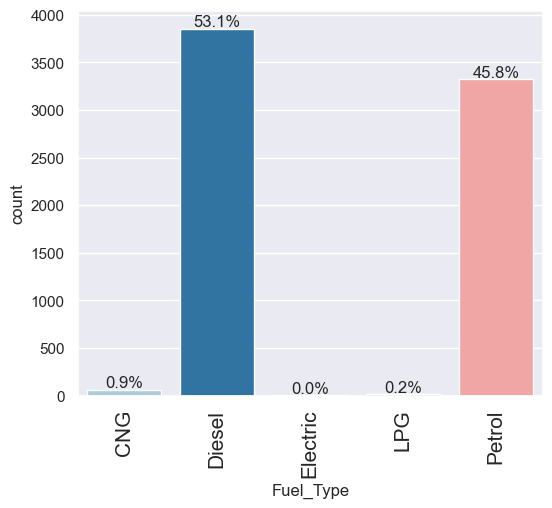

In [23]:
labeled_barplot(df1, "Fuel_Type", perc=True)

* Around 1% of the cars in the dataset do not run on diesel or petrol.

### Bivariate Analysis

#### Correlation Check

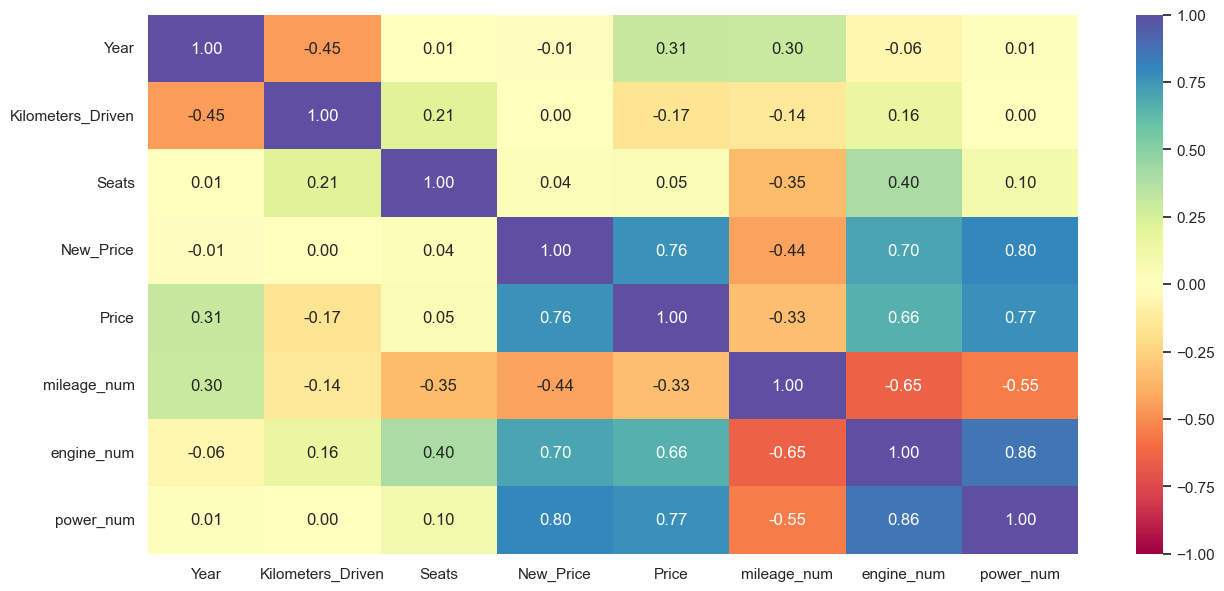

In [26]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df1.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", 
)
plt.show()

**Observations**

* `Power` and `Engine` are important predictors of used car price, but they are also highly correlated to each other.
* The price of a new car of the same model seems to be an important predictor of the used car price, which makes sense.

#### `Price` vs `Location`

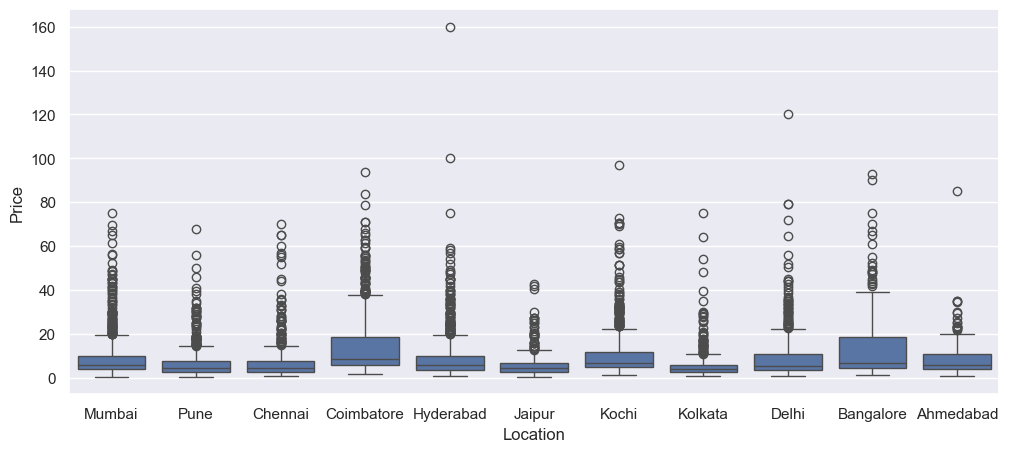

In [27]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="Location", y="Price", data=df1)
plt.show()

* The price of used cars has a large IQR in Coimbatore and Bangalore.

#### `Price` vs `Brand`

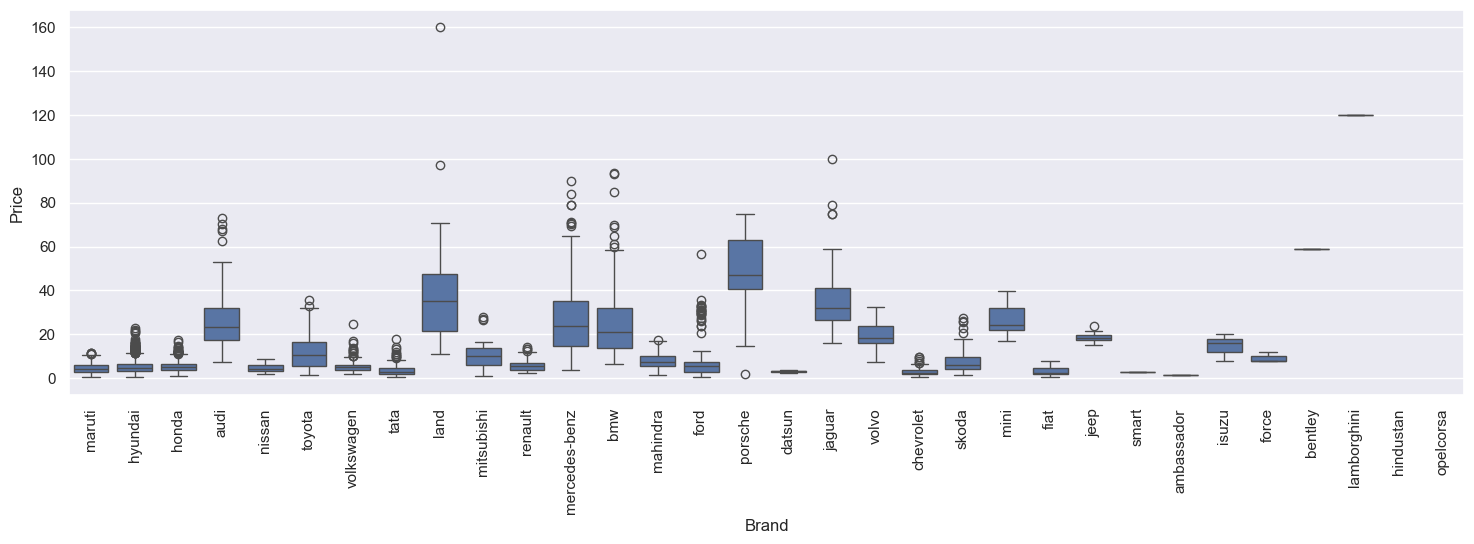

In [28]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Brand", y="Price", data=df)
plt.xticks(rotation=90)
plt.show()

* The price of used cars is lower for budget brands like Maruti, Tata, Fiat, etc.
* The price of used cars is higher for premium brands like Porsche, Audi, Lamborghini, etc.

#### `Price` vs `Year`

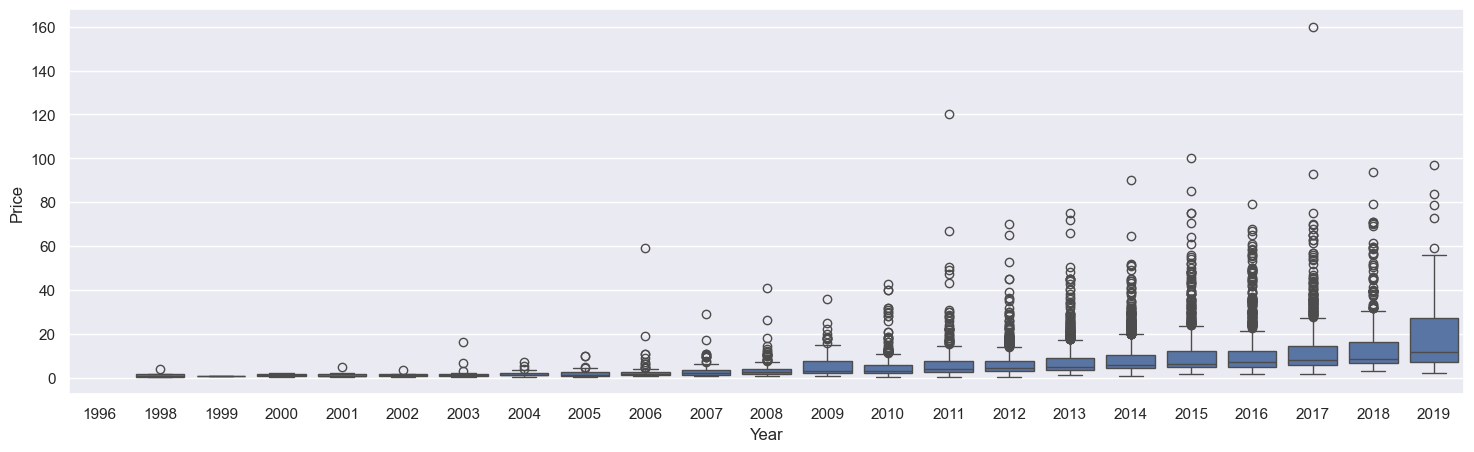

In [29]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Year", y="Price", data=df1)
plt.show()

* The price of used cars has increased over the years.

## Data Preprocessing

### Missing Value Treatment

- Let's drop the rows having NaN in the `Price` column, which is our target column.

In [30]:
# considering only the data points where price is not missing
df = df[df["Price"].notna()].copy()

# checking for missing values
df.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      1
Fuel_Type              0
Transmission           0
Owner_Type             0
Seats                 42
New_Price              0
Price                  0
mileage_num           70
engine_num            36
power_num            143
Brand                  0
Model                  0
dtype: int64

### Encoding the categorical variables

In [31]:
df.dtypes

Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Seats                float64
New_Price            float64
Price                float64
mileage_num          float64
engine_num           float64
power_num            float64
Brand                 object
Model                 object
dtype: object

In [32]:
data_car = df[['Brand', 'Model']].copy()

In [33]:
df = pd.get_dummies(df,
    columns=df.select_dtypes(include=["object","int64"]).columns.tolist(),
    drop_first=True,dtype=int
)

In [34]:
# Adding Brand and Model which is stored in data_car variable
# These will be needed during missing value imputation
df_final = pd.concat([df,data_car], axis=1)

In [35]:
df_final.shape

(6018, 287)

In [36]:
df_final.head()

,Kilometers_Driven,Seats,New_Price,Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Brand,Model
0,72000.0,5.0,5.51,1.75,26.60,998.0,58.16,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Train Test Split

In [37]:
# defining the dependent and independent variables
X = df_final.drop(["Price"], axis=1)
y = df_final["Price"]

In [38]:
# splitting the data in 80:20 ratio for train and temporary data
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2,random_state=1)

In [39]:
# splitting the temporary data in 50:50 ratio for validation and test data
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=1)

In [40]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in validation data =", x_val.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4814
Number of rows in validation data = 602
Number of rows in test data = 602


### Missing Value Treatment

In [41]:
def print_missing_values_columns(df):
    """
    Filters and prints only the columns from the DataFrame df that contain missing values.

    Parameters:
    - df: DataFrame
        The DataFrame to check for missing values.
    """
    missing_values_columns = df.columns[df.isnull().any()]
    missing_values_counts = df[missing_values_columns].isnull().sum()
    print(missing_values_counts)

In [42]:
# train data
print_missing_values_columns(x_train)

Kilometers_Driven      1
Seats                 39
mileage_num           59
engine_num            34
power_num            116
dtype: int64


In [43]:
# validation data
print_missing_values_columns(x_val)

Seats           1
mileage_num     5
power_num      13
dtype: int64


In [44]:
# test data
print_missing_values_columns(x_test)

Seats           2
mileage_num     6
engine_num      2
power_num      14
dtype: int64


**We'll impute these missing values one-by-one by taking the median number of seats for the particular car using the `Brand` and `Model`.**

In [45]:
# first, we calculate the median of Seats in the train set grouped by Brand and Model and store in train_grouped_median
train_grouped_median = x_train.groupby(["Brand", "Model"])["Seats"].median()
train_grouped_median

Brand       Model  
ambassador  classic    5.0
audi        a3         5.0
            a4         5.0
            a6         5.0
            a7         5.0
                      ... 
volvo       s60        5.0
            s80        5.0
            v40        5.0
            xc60       5.0
            xc90       7.0
Name: Seats, Length: 209, dtype: float64

**Working of the above code**

- It groups the training dataset `x_train` by the columns `Brand` and `Model`
- Within each group, it selects the `Seats` column
- Then, it calculates the median of the `Seats` column for each group
- This step effectively creates a mapping of the median number of seats for each unique combination of `Brand` and `Model`

In [46]:
# we will use the calculated median (train_grouped_median) to fill missing values in Seats for corresponding groups in the train set
x_train["Seats"] = x_train.apply(lambda row: row["Seats"] if not pd.isna(row["Seats"]) else train_grouped_median.get((row["Brand"], row["Model"]), np.nan), axis=1)

**Working of the above code**

For each row in the training dataset `x_train`:

- It checks if the value in the selected row of the `Seats` column (`row["Seats"]`) is not NaN (`pd.isna(row["Seats"])`)

- If the value is not NaN (i.e., it's not missing), it keeps the original value (`row["Seats"]`)

- If the value is NaN (missing), it uses `train_grouped_median.get((row["Brand"], row["Model"]), np.nan)` to fetch the median value for the corresponding `Brand` and `Model` combination from the train_grouped_median mapping created previously
    - If there's no corresponding median value (i.e., the combination of `Brand` and `Model` doesn't exist in `train_grouped_median`), it assigns NaN (`np.nan`).

This step essentially fills missing values in the `Seats` column of the validation dataset `x_train` using the median values calculated from the training dataset. It ensures that the imputation is done based on the specific `Brand` and `Model` combination, preserving the relationship between these features and the `Seats` column.

In [47]:
# checking data points where Seats is still missing
x_train[x_train["Seats"].isnull()]

,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Brand,Model
2369,56000.0,NaN,7.88,19.5,1061.0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

* Maruti Estilo can accommodate 5 people.

In [48]:
x_train["Seats"] = x_train["Seats"].fillna(5.0)

In [49]:
# we will use the calculated median (train_grouped_median) to fill missing values in Seats for corresponding groups in the validation set
x_val["Seats"] = x_val.apply(lambda row: row["Seats"] if not pd.isna(row["Seats"]) else train_grouped_median.get((row["Brand"], row["Model"]), np.nan), axis=1)

- The above code does the same operation as the one previously used for imputing missing values
- The only difference is that it operates on the validation set (`x_val`) instead of the training set (`x_train`)

In [50]:
# checking the missing values in x_val
print_missing_values_columns(x_val)

Seats           1
mileage_num     5
power_num      13
dtype: int64


In [51]:
# checking data points where Seats is still missing
x_val[x_val["Seats"].isnull()]

,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Brand,Model
3882,40000.0,NaN,7.88,19.5,1061.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

* Maruti Estilo can accommodate 5 people.

In [52]:
x_val["Seats"] = x_val["Seats"].fillna(5.0)

In [53]:
# checking the missing values in x_val
print_missing_values_columns(x_val)

mileage_num     5
power_num      13
dtype: int64


In [54]:
# Same method is applied on test data
x_test["Seats"] = x_test.apply(lambda row: row["Seats"] if not pd.isna(row["Seats"]) else train_grouped_median.get((row["Brand"], row["Model"]), np.nan), axis=1)

In [55]:
# checking the missing values in x_test
print_missing_values_columns(x_test)

mileage_num     6
engine_num      2
power_num      14
dtype: int64


**We will use a similar method to fill missing values for the `Kilometers_Driven`, `mileage_num`, `engine_num`, and `power_num` columns.**

In [56]:
cols_list = ["Kilometers_Driven","mileage_num", "engine_num", "power_num"]

# Step 1: Calculate the median of specified columns in x_train grouped by Brand and Model
train_grouped_median = x_train.groupby(["Brand", "Model"])[cols_list].median()

# Step 2: Use the calculated median to fill missing values in specified columns for corresponding groups in train, validation and test data
for col in cols_list:
    x_train[col] = x_train.apply(lambda row: row[col] if not pd.isna(row[col]) else train_grouped_median[col].get((row["Brand"], row["Model"]), np.nan), axis=1)
    x_val[col] = x_val.apply(lambda row: row[col] if not pd.isna(row[col]) else train_grouped_median[col].get((row["Brand"], row["Model"]), np.nan), axis=1)
    x_test[col] = x_test.apply(lambda row: row[col] if not pd.isna(row[col]) else train_grouped_median[col].get((row["Brand"], row["Model"]), np.nan), axis=1)

In [57]:
# checking the missing values in x_train
print_missing_values_columns(x_train)

mileage_num    7
power_num      9
dtype: int64


In [58]:
# checking the missing values in x_val
print_missing_values_columns(x_val)

mileage_num    1
power_num      1
dtype: int64


In [59]:
# checking the missing values in x_test
print_missing_values_columns(x_test)

mileage_num    1
power_num      1
dtype: int64


* There are still some missing values in `mileage_num` and `power_num`.
* We'll impute these missing values by taking the median grouped by the `Brand`.

In [60]:
cols_list = ["mileage_num", "power_num"]

# Step 1: Calculate the median of specified columns in x_train grouped by Brand and Model
train_grouped_median = x_train.groupby(["Brand"])[cols_list].median()

# Step 2: Use the calculated median to fill missing values in specified columns for corresponding groups in train, validation and test data
for col in cols_list:
    x_train[col] = x_train.apply(lambda row: row[col] if not pd.isna(row[col]) else train_grouped_median[col].get((row["Brand"]), np.nan), axis=1)
    x_val[col] = x_val.apply(lambda row: row[col] if not pd.isna(row[col]) else train_grouped_median[col].get((row["Brand"]), np.nan), axis=1)
    x_test[col] = x_test.apply(lambda row: row[col] if not pd.isna(row[col]) else train_grouped_median[col].get((row["Brand"]), np.nan), axis=1)

In [61]:
print_missing_values_columns(x_train)

mileage_num    1
power_num      1
dtype: int64


In [62]:
print_missing_values_columns(x_val)

Series([], dtype: float64)


In [63]:
print_missing_values_columns(x_test)

Series([], dtype: float64)


* There are still some missing values in train data (`mileage_num` and `power_num`) and all missing values in val and test data are imputed.
* We'll impute train missing values using the column median across the entire data.

In [64]:
cols_list = ["mileage_num", "power_num"]

for col in cols_list:
    x_train[col] = x_train[col].fillna(df[col].median())

In [65]:
print_missing_values_columns(x_train)

Series([], dtype: float64)


- Missing values in all columns of x_train are imputed.

In [66]:
# Dropping Brand and Model from train, validation, and test data as we already have dummy variables for them
x_train = x_train.drop(['Brand','Model'],axis=1)
x_val = x_val.drop(['Brand','Model'],axis=1)
x_test = x_test.drop(['Brand','Model'],axis=1)

### Normalizing the numerical variables

In [67]:
# Define the columns to scale
num_columns = ["Kilometers_Driven", "Seats", "New_Price", "mileage_num", "engine_num", "power_num"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(x_train[num_columns])

StandardScaler()

* Once the scaler object fits on the data using the `fit()` method, it stores the parameters (mean and standard deviation) for normalization based on the training data

* We then use these parameters to normalize the validation and test data

* This is similar to what we did in the Missing Value Treatment section.
    - The only difference is that there we had to explicitly store the parameters (median values), while here it is done implicitly by sklearn in this case

In [68]:
# Transform selected columns in x_train, x_val, and x_test using the fitted scaler

x_train[num_columns] = scaler.fit_transform(x_train[num_columns])

x_val[num_columns] = scaler.transform(x_val[num_columns])

x_test[num_columns] = scaler.transform(x_test[num_columns])

In [69]:
x_train.head()

,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
4269,-0.694078,-0.351313,-0.637638,1.136662,-1.034356,-0.841807,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [218]:
x_train.shape

(4814, 284)

### Utility functions

In [70]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

We'll create a dataframe to store the results from all the models we build

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [71]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a neural network model
def model_performance(model,predictors,target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors).reshape(-1)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf =  {
            "RMSE": [rmse],
            "MAE": [mae],
            "R-squared": [r2],
            "Adj. R-squared": [adjr2],
            "MAPE": [mape]}

    return df_perf

columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","time(secs)","Train_loss","Valid_loss","Train_R-squared","Valid_R-squared"]

results = pd.DataFrame(columns=columns)

## Model building

We'll use $R^2$ as our metric of choice for the model to optimize.

In [73]:
#Defining the list of metrics to be used for all the models.
metrics = [tf.keras.metrics.R2Score(name="r2_score")]

### Model 0

- We will start off with a simple neural network with
  - No Hidden layers
  - Gradient descent as the optimization algorithm.

In [80]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [81]:
#Initializing the neural network
model = Sequential()
model.add(Dense(1,input_dim=x_train.shape[1]))

In [82]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │           285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285 (1.11 KB)

 Trainable params: 285 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [84]:
epochs = 10
batch_size = x_train.shape[0]

In [85]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 212.9668 - r2_score: -0.5842 - val_loss: 229.4064 - val_r2_score: -0.6216
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 197.4542 - r2_score: -0.5590 - val_loss: 213.0991 - val_r2_score: -0.5064
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 183.4492 - r2_score: -0.4484 - val_loss: 198.3264 - val_r2_score: -0.4019
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 170.7959 - r2_score: -0.3485 - val_loss: 184.9332 - val_r2_score: -0.3073
Epoch 5/10


2025-03-29 20:04:32.831205: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-03-29 20:04:32.831402: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 159.3555 - r2_score: -0.2582 - val_loss: 172.7811 - val_r2_score: -0.2214
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 149.0038 - r2_score: -0.1764 - val_loss: 161.7463 - val_r2_score: -0.1434
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 139.6302 - r2_score: -0.1024 - val_loss: 151.7180 - val_r2_score: -0.0725
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 131.1358 - r2_score: -0.0354 - val_loss: 142.5970 - val_r2_score: -0.0080
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 123.4324 - r2_score: 0.0255 - val_loss: 134.2945 - val_r2_score: 0.0507
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 116.4407 - r2_score: 0.0807 - val_loss: 126.7310 - val_r2_score: 0.1042


In [86]:
print("Time taken in seconds ",end-start)

Time taken in seconds  0.6237452030181885


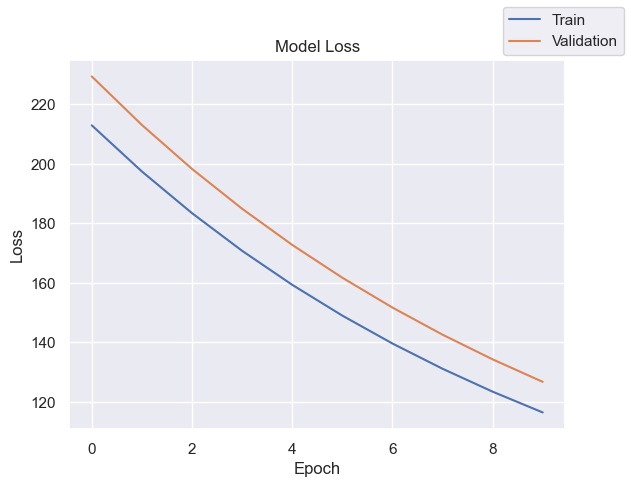

In [87]:
plot(history,'loss')

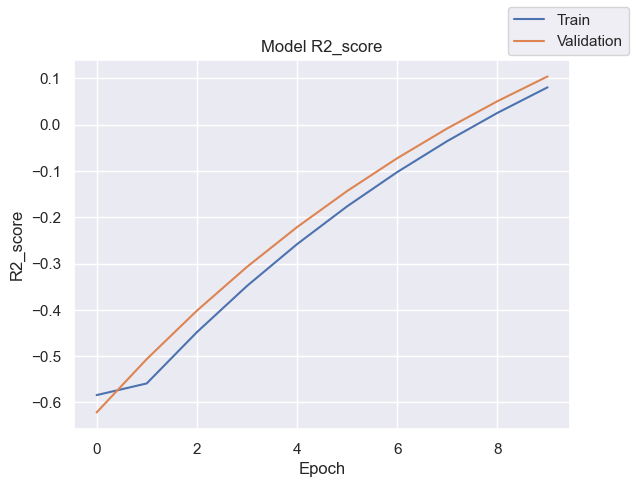

In [88]:
plot(history,'r2_score')

In [89]:
results.loc[0]=['-','-','-',epochs,batch_size,'GD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [90]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,0.623745,116.440742,126.730965,0.08066,0.104156


- Since it's a very simple neural network, the scores aren't good.

### Model 1

- Let's try increasing the epochs to check whether the performance is improving or not.

In [91]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [92]:
#Initializing the neural network
model = Sequential()
model.add(Dense(1,input_dim=x_train.shape[1]))

In [93]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │           285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285 (1.11 KB)

 Trainable params: 285 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [95]:
epochs = 25
batch_size = x_train.shape[0]

In [96]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 213.0691 - r2_score: -0.5847 - val_loss: 229.0668 - val_r2_score: -0.6192
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 197.5946 - r2_score: -0.5601 - val_loss: 212.8193 - val_r2_score: -0.5044
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 183.6156 - r2_score: -0.4497 - val_loss: 198.0933 - val_r2_score: -0.4003
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 170.9786 - r2_score: -0.3499 - val_loss: 184.7361 - val_r2_score: -0.3059
Epoch 5/25


2025-03-29 20:04:58.959967: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-03-29 20:04:58.960214: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 159.5464 - r2_score: -0.2597 - val_loss: 172.6110 - val_r2_score: -0.2202
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 149.1969 - r2_score: -0.1780 - val_loss: 161.5961 - val_r2_score: -0.1423
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 139.8207 - r2_score: -0.1039 - val_loss: 151.5817 - val_r2_score: -0.0715
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 131.3200 - r2_score: -0.0368 - val_loss: 142.4700 - val_r2_score: -0.0071
Epoch 9/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 123.6074 - r2_score: 0.0241 - val_loss: 134.1730 - val_r2_score: 0.0515
Epoch 10/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 116.6046 - r2_score: 0.0794 - val_loss: 126.6120 - val_r2_score: 0.1050
Epoch 11/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 110.2416 - r2_score: 0.1296 - val_loss: 119.7162 - val_r2_score: 0.1537
Epoch 12/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 104.4555 - r2_score: 0.1753 - val_loss: 

In [97]:
print("Time taken in seconds ",end-start)

Time taken in seconds  1.4175686836242676


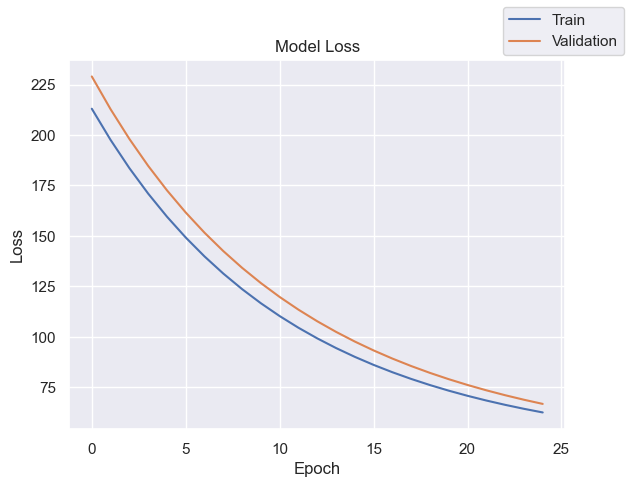

In [98]:
plot(history,'loss')

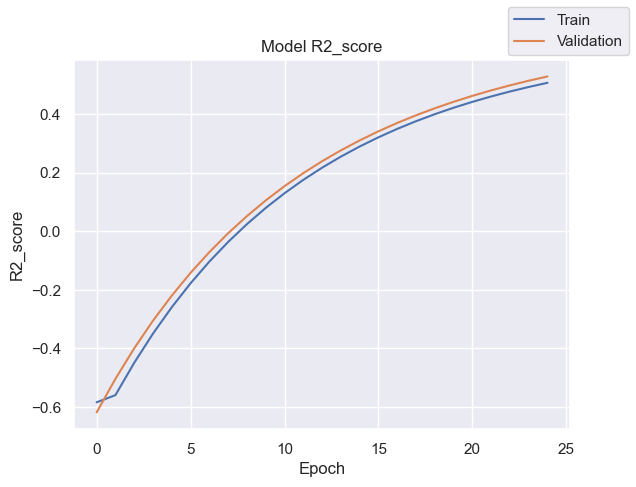

In [99]:
plot(history,'r2_score')

In [100]:
results.loc[1]=['-','-','-',epochs,batch_size,'GD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [101]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,0.623745,116.440742,126.730965,0.080660,0.104156
1,-,-,-,25,4814,GD,1.417569,62.456074,66.692467,0.506888,0.528560


- As expected, we see an increase in the $R^2$, which is great.

### Model 2

- Even though the performance of the previous model was good, the improvement in scores from one epoch to another is very slight since the updates happen only once.
- Let's now incorporate SGD to improve learning.

In [102]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [103]:
#Initializing the neural network
model = Sequential()
model.add(Dense(1,input_dim=x_train.shape[1]))

In [104]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │           285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285 (1.11 KB)

 Trainable params: 285 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [106]:
epochs = 25
batch_size = 32

In [107]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
 12/151 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 222.5709 - r2_score: 0.3100

2025-03-29 20:05:10.825540: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-03-29 20:05:10.825812: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 87.1458 - r2_score: 0.4425 - val_loss: 35.6425 - val_r2_score: 0.7480
Epoch 2/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 33.7502 - r2_score: 0.7359 - val_loss: 33.0768 - val_r2_score: 0.7662
Epoch 3/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 31.4795 - r2_score: 0.7536 - val_loss: 31.4865 - val_r2_score: 0.7774
Epoch 4/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 30.1022 - r2_score: 0.7643 - val_loss: 30.4104 - val_r2_score: 0.7850
Epoch 5/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 29.1603 - r2_score: 0.7717 - val_loss: 29.6241 - val_r2_score: 0.7906
Epoch 6/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 28.4608 - r2_score: 0.7771 - val_loss: 29.0101 - val_r2_score: 0.7949
Epoch 7/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 27.9075 - r2_score: 0.7815 - val_loss: 28.5045 - val_r2_score: 0.7985
Epoch 8/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 27.4490 - r2_score: 0.7850 - val_

In [108]:
print("Time taken in seconds ",end-start)

Time taken in seconds  38.35042190551758


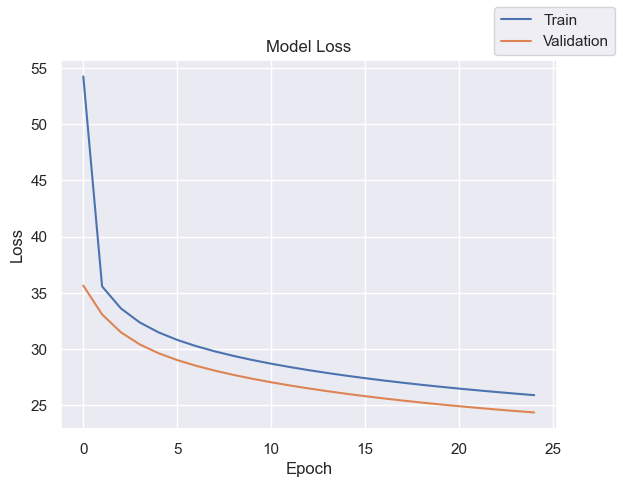

In [109]:
plot(history,'loss')

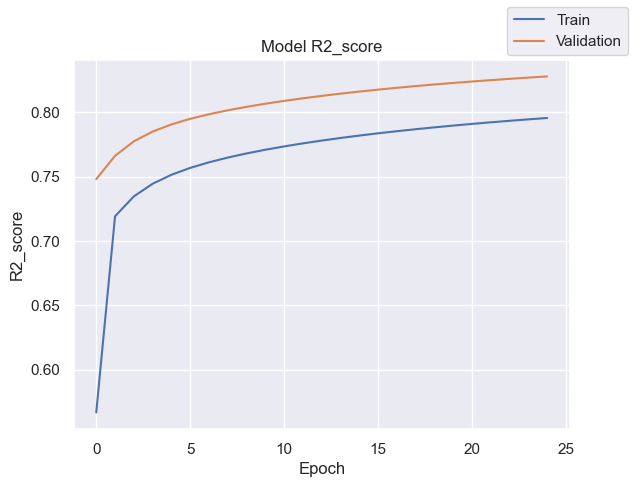

In [110]:
plot(history,'r2_score')

In [111]:
results.loc[2]=['-','-','-',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [112]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,0.623745,116.440742,126.730965,0.080660,0.104156
1,-,-,-,25,4814,GD,1.417569,62.456074,66.692467,0.506888,0.528560
2,-,-,-,25,32,SGD,38.350422,25.890556,24.349398,0.795585,0.827877


- After the first epoch, we see an $R^2$ of 0.72, which is great.
- Also, the improvement in the $R^2$ after each epoch has also increased.
- Note that the time taken to train the model has also increased as model parameters are being updated more often.

### Model 3

- Let's now increase the batch size to 64 to see if the performance improves.

In [113]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [114]:
#Initializing the neural network
model = Sequential()
model.add(Dense(1,input_dim=x_train.shape[1]))

In [115]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │           285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285 (1.11 KB)

 Trainable params: 285 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [117]:
epochs = 25
batch_size = 64

In [118]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
13/76 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 208.7870 - r2_score: 0.3690

2025-03-29 20:06:05.160046: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-03-29 20:06:05.160336: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 110.6543 - r2_score: 0.4000 - val_loss: 38.6473 - val_r2_score: 0.7268
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 36.6564 - r2_score: 0.7146 - val_loss: 35.5865 - val_r2_score: 0.7484
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 34.0742 - r2_score: 0.7343 - val_loss: 34.1261 - val_r2_score: 0.7588
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 32.6680 - r2_score: 0.7452 - val_loss: 33.0166 - val_r2_score: 0.7666
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 31.6368 - r2_score: 0.7532 - val_loss: 32.1340 - val_r2_score: 0.7728
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 30.8350 - r2_score: 0.7595 - val_loss: 31.4160 - val_r2_score: 0.7779
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 30.1907 - r2_score: 0.7645 - val_loss: 30.8201 - val_r2_score: 0.7821
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 29.6591 - r2_score: 0.7686 - val_loss: 30.3162 -

In [119]:
print("Time taken in seconds ",end-start)

Time taken in seconds  20.122936010360718


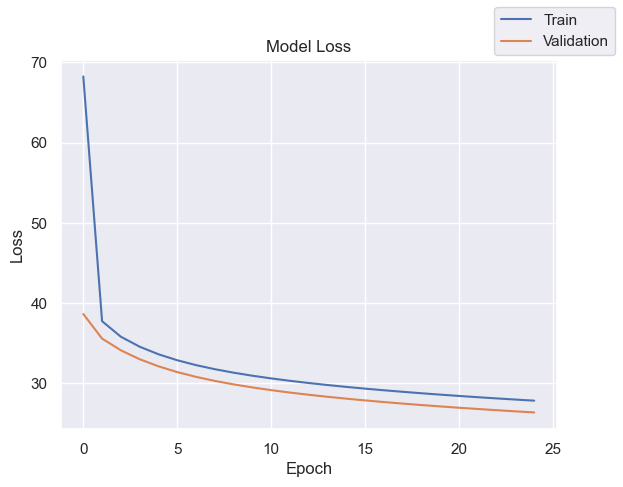

In [120]:
plot(history,'loss')

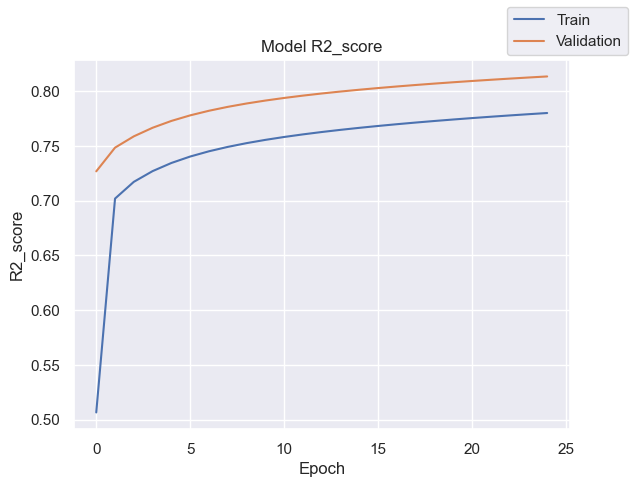

In [121]:
plot(history,'r2_score')

In [122]:
results.loc[3]=['-','-','-',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [123]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,0.623745,116.440742,126.730965,0.080660,0.104156
1,-,-,-,25,4814,GD,1.417569,62.456074,66.692467,0.506888,0.528560
2,-,-,-,25,32,SGD,38.350422,25.890556,24.349398,0.795585,0.827877
3,-,-,-,25,64,SGD,20.122936,27.855831,26.387531,0.780069,0.813470


- The performance hasn't improved, but the time taken to train the model has reduced.
- There's always a tradeoff here - performance vs computation time.

### Model 4

- Let's now add a hidden layer with 128 neurons.
- We'll use sigmoid as the activation function.

In [124]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [125]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="sigmoid",input_dim=x_train.shape[1]))
model.add(Dense(1))

In [126]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        36,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,609 (143.00 KB)

 Trainable params: 36,609 (143.00 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [128]:
epochs = 25
batch_size = 64

In [129]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
 6/76 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 228.7632 - r2_score: 0.5077 

2025-03-29 20:06:49.195082: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-03-29 20:06:49.195279: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 102.4339 - r2_score: 0.4285 - val_loss: 37.3536 - val_r2_score: 0.7360
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 36.3937 - r2_score: 0.7171 - val_loss: 33.3402 - val_r2_score: 0.7643
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 31.9533 - r2_score: 0.7511 - val_loss: 30.7259 - val_r2_score: 0.7828
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 29.1738 - r2_score: 0.7726 - val_loss: 28.6133 - val_r2_score: 0.7977
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 27.0212 - r2_score: 0.7892 - val_loss: 26.8787 - val_r2_score: 0.8100
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 25.2117 - r2_score: 0.8031 - val_loss: 25.3969 - val_r2_score: 0.8205
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 23.6203 - r2_score: 0.8154 - val_loss: 24.0860 - val_r2_score: 0.8297
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 22.2006 - r2_score: 0.8264 - val_loss: 22.9048 -

In [130]:
print("Time taken in seconds ",end-start)

Time taken in seconds  21.320707082748413


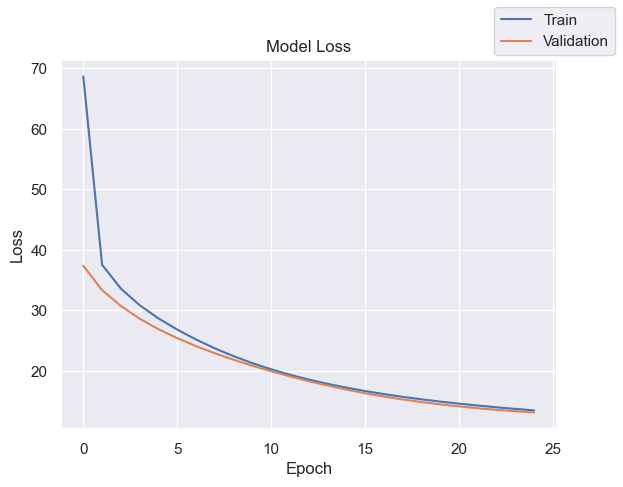

In [131]:
plot(history,'loss')

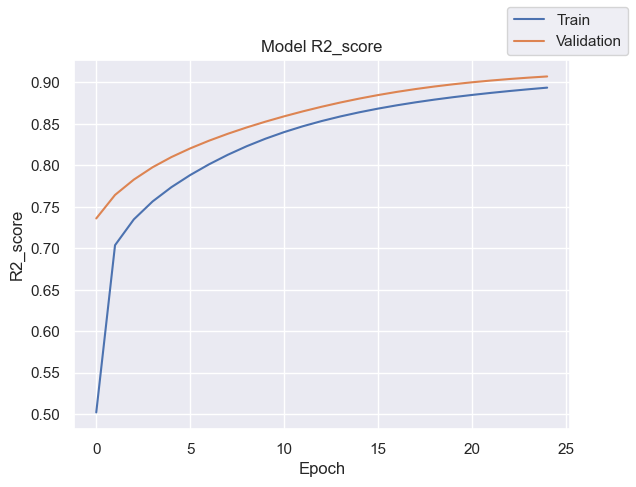

In [132]:
plot(history,'r2_score')

In [133]:
results.loc[4]=[1,128,'sigmoid',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [134]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,0.623745,116.440742,126.730965,0.080660,0.104156
1,-,-,-,25,4814,GD,1.417569,62.456074,66.692467,0.506888,0.528560
2,-,-,-,25,32,SGD,38.350422,25.890556,24.349398,0.795585,0.827877
3,-,-,-,25,64,SGD,20.122936,27.855831,26.387531,0.780069,0.813470
4,1,128,sigmoid,25,64,SGD,21.320707,13.456876,13.119248,0.893753,0.907262


- We see an improvement in the model performance.
- The time taken too has not increased drastically.


### Model 5

- We'll now change the activation for the hidden layer from sigmoid to tanh.

In [135]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [136]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="tanh",input_dim=x_train.shape[1]))
model.add(Dense(1))

In [137]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        36,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,609 (143.00 KB)

 Trainable params: 36,609 (143.00 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [139]:
epochs = 25
batch_size = 64

In [140]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
11/76 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 184.3376 - r2_score: 0.5447

2025-03-29 20:07:25.536956: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-03-29 20:07:25.537276: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 79.1852 - r2_score: 0.5961 - val_loss: 33.7584 - val_r2_score: 0.7614
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 29.9377 - r2_score: 0.7674 - val_loss: 26.6052 - val_r2_score: 0.8119
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 25.5831 - r2_score: 0.8008 - val_loss: 21.9708 - val_r2_score: 0.8447
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 21.9856 - r2_score: 0.8283 - val_loss: 20.1133 - val_r2_score: 0.8578
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 19.5341 - r2_score: 0.8472 - val_loss: 18.7945 - val_r2_score: 0.8671
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 17.7939 - r2_score: 0.8608 - val_loss: 17.4243 - val_r2_score: 0.8768
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 16.4307 - r2_score: 0.8714 - val_loss: 16.1336 - val_r2_score: 0.8860
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 15.3116 - r2_score: 0.8801 - val_loss: 14.9779 - 

In [141]:
print("Time taken in seconds ",end-start)

Time taken in seconds  21.438233852386475


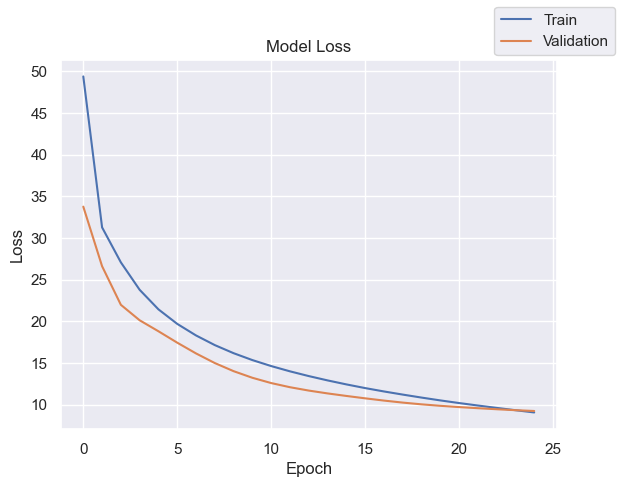

In [142]:
plot(history,'loss')

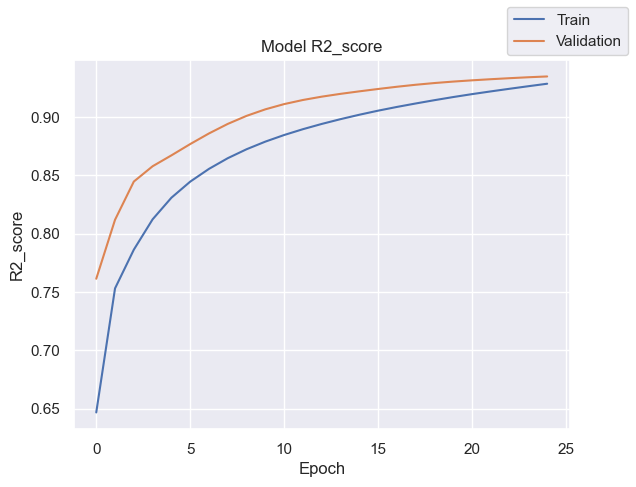

In [143]:
plot(history,'r2_score')

In [144]:
results.loc[5]=[1,128,'tanh',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [145]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,0.623745,116.440742,126.730965,0.080660,0.104156
1,-,-,-,25,4814,GD,1.417569,62.456074,66.692467,0.506888,0.528560
2,-,-,-,25,32,SGD,38.350422,25.890556,24.349398,0.795585,0.827877
3,-,-,-,25,64,SGD,20.122936,27.855831,26.387531,0.780069,0.813470
4,1,128,sigmoid,25,64,SGD,21.320707,13.456876,13.119248,0.893753,0.907262
5,1,128,tanh,25,64,SGD,21.438234,9.046599,9.221515,0.928574,0.934814


- Changing the activation has improved the $R^2$.

### Model 6

- We'll now change the activation for the hidden layer from tanh to relu

In [146]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [147]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
model.add(Dense(1))

In [148]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        36,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,609 (143.00 KB)

 Trainable params: 36,609 (143.00 KB)

 Non-trainable params: 0 (0.00 B)

In [149]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [150]:
epochs = 25
batch_size = 64

In [151]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
11/76 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 180.8850 - r2_score: 0.5717

2025-03-29 20:08:03.716196: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-03-29 20:08:03.716458: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 73.6553 - r2_score: 0.6361 - val_loss: 22.0140 - val_r2_score: 0.8444
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 24.1144 - r2_score: 0.8111 - val_loss: 19.8198 - val_r2_score: 0.8599
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 20.7746 - r2_score: 0.8370 - val_loss: 19.2406 - val_r2_score: 0.8640
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 18.8096 - r2_score: 0.8525 - val_loss: 19.0939 - val_r2_score: 0.8650
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 17.5026 - r2_score: 0.8629 - val_loss: 18.5861 - val_r2_score: 0.8686
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 16.5234 - r2_score: 0.8707 - val_loss: 18.2883 - val_r2_score: 0.8707
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 15.7487 - r2_score: 0.8769 - val_loss: 17.3826 - val_r2_score: 0.8771
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 15.1870 - r2_score: 0.8814 - val_loss: 16.8359 - 

In [152]:
print("Time taken in seconds ",end-start)

Time taken in seconds  21.457189321517944


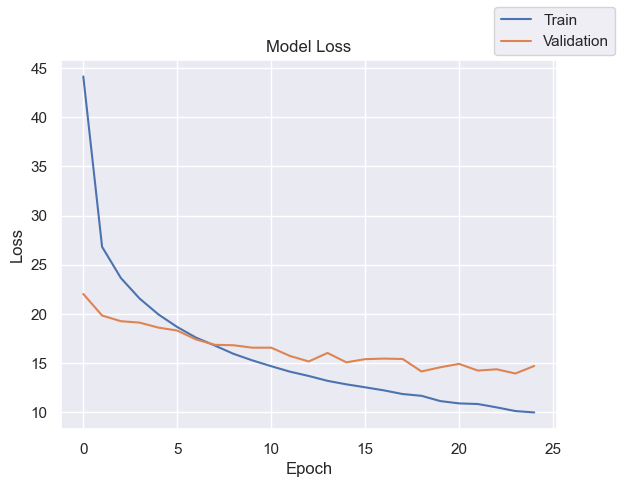

In [153]:
plot(history,'loss')

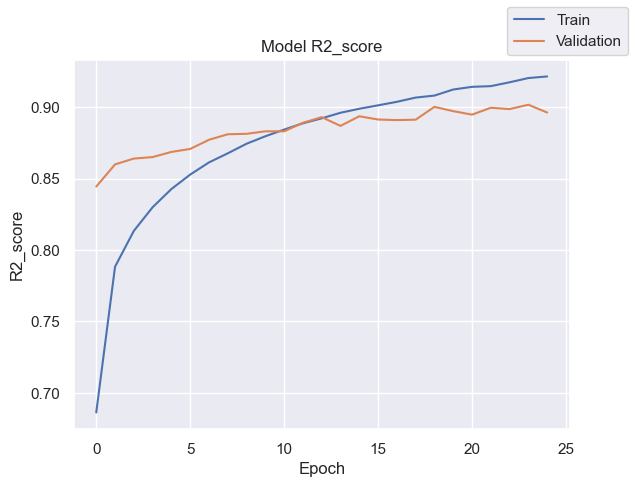

In [154]:
plot(history,'r2_score')

In [155]:
results.loc[6]=[1,128,'relu',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [156]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,0.623745,116.440742,126.730965,0.080660,0.104156
1,-,-,-,25,4814,GD,1.417569,62.456074,66.692467,0.506888,0.528560
2,-,-,-,25,32,SGD,38.350422,25.890556,24.349398,0.795585,0.827877
3,-,-,-,25,64,SGD,20.122936,27.855831,26.387531,0.780069,0.813470
4,1,128,sigmoid,25,64,SGD,21.320707,13.456876,13.119248,0.893753,0.907262
5,1,128,tanh,25,64,SGD,21.438234,9.046599,9.221515,0.928574,0.934814
6,1,128,relu,25,64,SGD,21.457189,9.949127,14.682941,0.921448,0.896208


- Changing the activation has improved (slightly) the train $R^2$ but not validation $R^2$.

### Model 7

* We will now add one more hidden layer with 32 neurons.
* We'll use relu activation in both hidden layers.

In [157]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [158]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))

In [159]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        36,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,641 (158.75 KB)

 Trainable params: 40,641 (158.75 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [161]:
epochs = 25
batch_size = 64

In [162]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
 6/76 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 241.5800 - r2_score: 0.5450 

2025-03-29 20:08:40.615496: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-03-29 20:08:40.615748: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 130.5843 - r2_score: 0.2586 - val_loss: 166.5616 - val_r2_score: -0.1774
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 135.1842 - r2_score: -0.0412 - val_loss: 116.6754 - val_r2_score: 0.1752
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 97.5213 - r2_score: 0.2497 - val_loss: 88.3129 - val_r2_score: 0.3757
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 79.3078 - r2_score: 0.3891 - val_loss: 73.1034 - val_r2_score: 0.4832
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 73.2551 - r2_score: 0.4340 - val_loss: 68.7961 - val_r2_score: 0.5137
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 71.2856 - r2_score: 0.4483 - val_loss: 62.9109 - val_r2_score: 0.5553
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 65.4136 - r2_score: 0.4937 - val_loss: 49.9197 - val_r2_score: 0.6471
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 51.0335 - r2_score: 0.6052 - val_loss: 53.0

In [163]:
print("Time taken in seconds ",end-start)

Time taken in seconds  22.827528953552246


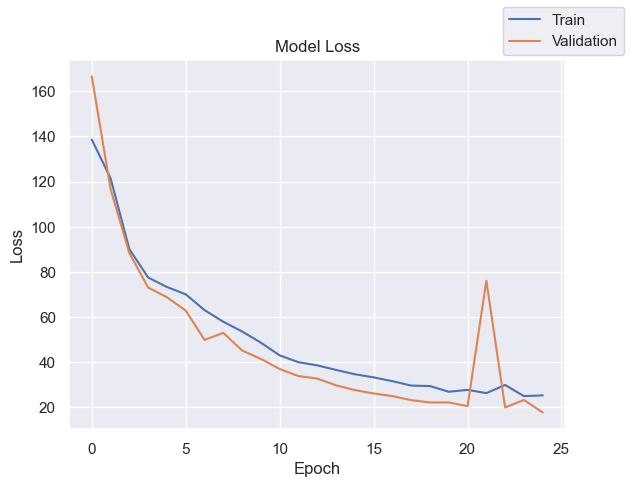

In [164]:
plot(history,'loss')

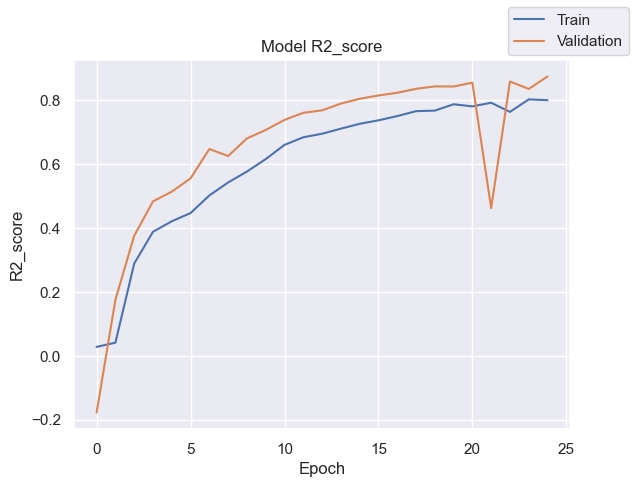

In [165]:
plot(history,'r2_score')

In [166]:
results.loc[7]=[2,[128,32],['relu','relu'],epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [167]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,0.623745,116.440742,126.730965,0.080660,0.104156
1,-,-,-,25,4814,GD,1.417569,62.456074,66.692467,0.506888,0.528560
2,-,-,-,25,32,SGD,38.350422,25.890556,24.349398,0.795585,0.827877
3,-,-,-,25,64,SGD,20.122936,27.855831,26.387531,0.780069,0.813470
4,1,128,sigmoid,25,64,SGD,21.320707,13.456876,13.119248,0.893753,0.907262
5,1,128,tanh,25,64,SGD,21.438234,9.046599,9.221515,0.928574,0.934814
6,1,128,relu,25,64,SGD,21.457189,9.949127,14.682941,0.921448,0.896208
7,2,"[128, 32]","[relu, relu]",25,64,SGD,22.827529,25.337517,17.787106,0.799951,0.874265


- Adding a hidden layer didn't improve the performance of the model.

## Model Performance Comparison and Final Model Selection

In [168]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,-,-,-,10,4814,GD,0.623745,116.440742,126.730965,0.080660,0.104156
1,-,-,-,25,4814,GD,1.417569,62.456074,66.692467,0.506888,0.528560
2,-,-,-,25,32,SGD,38.350422,25.890556,24.349398,0.795585,0.827877
3,-,-,-,25,64,SGD,20.122936,27.855831,26.387531,0.780069,0.813470
4,1,128,sigmoid,25,64,SGD,21.320707,13.456876,13.119248,0.893753,0.907262
5,1,128,tanh,25,64,SGD,21.438234,9.046599,9.221515,0.928574,0.934814
6,1,128,relu,25,64,SGD,21.457189,9.949127,14.682941,0.921448,0.896208
7,2,"[128, 32]","[relu, relu]",25,64,SGD,22.827529,25.337517,17.787106,0.799951,0.874265


  - Among all other models, Model 6 achieved the highest training and validation scores.

  - A training R2 score of ~93% and a validation R2 score of ~94% suggest that the model is performing slightly better on the validation data compared to the training data.

      - This indicates that the model is likely not overfitting and is generalizing well to unseen data.

- We'll go ahead with this model as our final model.

- Let's rebuild it and check its performance across multiple metrics

### Final Model

In [169]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [170]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
model.add(Dense(1))

In [171]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        36,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,609 (143.00 KB)

 Trainable params: 36,609 (143.00 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [173]:
epochs = 25
batch_size = 64

In [174]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test) , batch_size=batch_size, epochs=epochs)

Epoch 1/25
11/76 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 193.5181 - r2_score: 0.5039

2025-03-29 20:09:24.717525: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-03-29 20:09:24.717845: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 77.8568 - r2_score: 0.6008 - val_loss: 15.2068 - val_r2_score: 0.8413
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 24.1716 - r2_score: 0.8107 - val_loss: 13.6155 - val_r2_score: 0.8579
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 20.8059 - r2_score: 0.8368 - val_loss: 12.7509 - val_r2_score: 0.8670
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 18.8678 - r2_score: 0.8521 - val_loss: 12.0689 - val_r2_score: 0.8741
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 17.5269 - r2_score: 0.8628 - val_loss: 11.8058 - val_r2_score: 0.8768
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 16.6357 - r2_score: 0.8700 - val_loss: 11.3390 - val_r2_score: 0.8817
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 15.8314 - r2_score: 0.8764 - val_loss: 10.9207 - val_r2_score: 0.8860
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 15.2136 - r2_score: 0.8814 - val_loss: 10.4318 - 

In [175]:
train_perf = model_performance(model,x_train,y_train)
print("Train performance")
pd.DataFrame(train_perf)

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


2025-03-29 20:09:46.090582: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-03-29 20:09:46.090787: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

Train performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.533085,1.682633,0.901445,0.895265,20.62971


In [176]:
x_val.isnull().sum()

Kilometers_Driven    0
Seats                0
New_Price            0
mileage_num          0
engine_num           0
                    ..
Model_xylo           0
Model_yeti           0
Model_z4             0
Model_zen            0
Model_zest           0
Length: 284, dtype: int64

In [177]:
y_val.isnull().sum()

0

In [178]:
valid_perf = model_performance(model,x_val,y_val)
print("Validation data performance")
pd.DataFrame(valid_perf)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Validation data performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.876201,2.009302,0.893791,0.798638,21.069643


In [179]:
test_perf = model_performance(model,x_test,y_test)
print("Test performance")
pd.DataFrame(test_perf)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test performance


2025-03-29 20:09:51.331326: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-03-29 20:09:51.331655: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.985105,1.604768,0.907021,0.823721,19.964909


- The model has an $R^2$ of ~0.95 on the test set, which means it can explain ~95% of the variance in the unseen data

- The RMSE value is ~2.3 , which means the model can predict the price of a used car within 2.3 units of the actual value

- The MAPE value is ~18 , which means the model can predict the price of a used car within  ~ 18% of the actual value

## Business Insights and Recommendations

1. Our neural network model has successfully explained approximately 94% of the variation in the data.
2. Our analysis has revealed that certain factors, such as the year of manufacture, the number of seats, and the maximum power of the engine, tend to increase the price of a used car. Conversely, factors like the distance traveled and engine volume tend to decrease the price of a used car.
3. Certain markets tend to have higher prices, and it would be beneficial for Cars4U to focus on these markets and establish offices in these areas if necessary.
4. We need to gather data on the cost side of things before discussing profitability in the business.
5. After analyzing the data, the next step would be to cluster the different data sets and determine whether we should create multiple models for different locations or car types.





## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### `Kilometers_Driven`

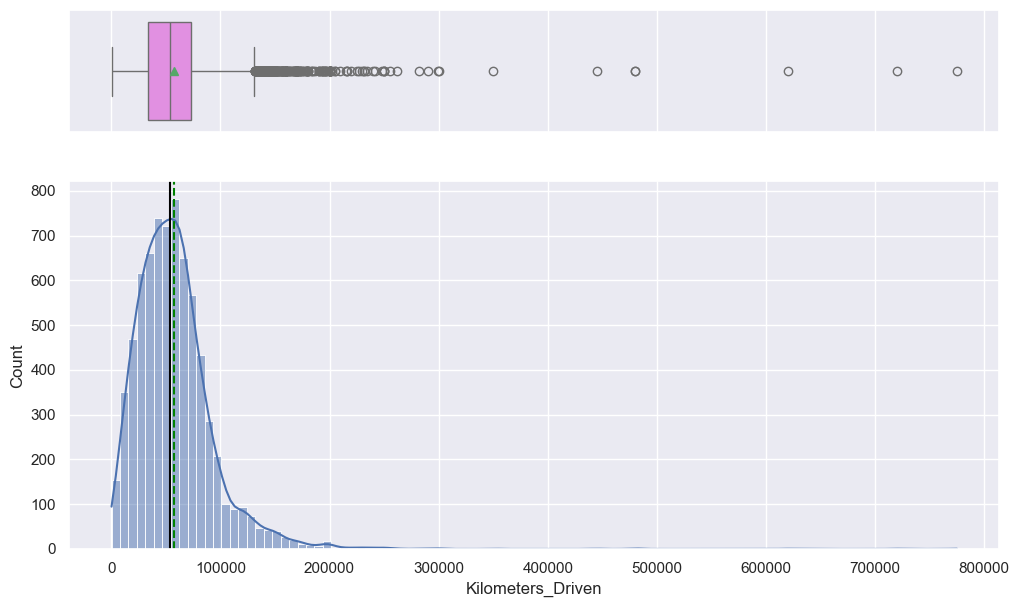

In [203]:
histogram_boxplot(data, "Kilometers_Driven", bins=100, kde=True)

**Observations**

* This is another highly skewed distribution.
* Let us use log transformation on this column too.

In [181]:
df1["kilometers_driven_log"] = np.log(df1["Kilometers_Driven"])

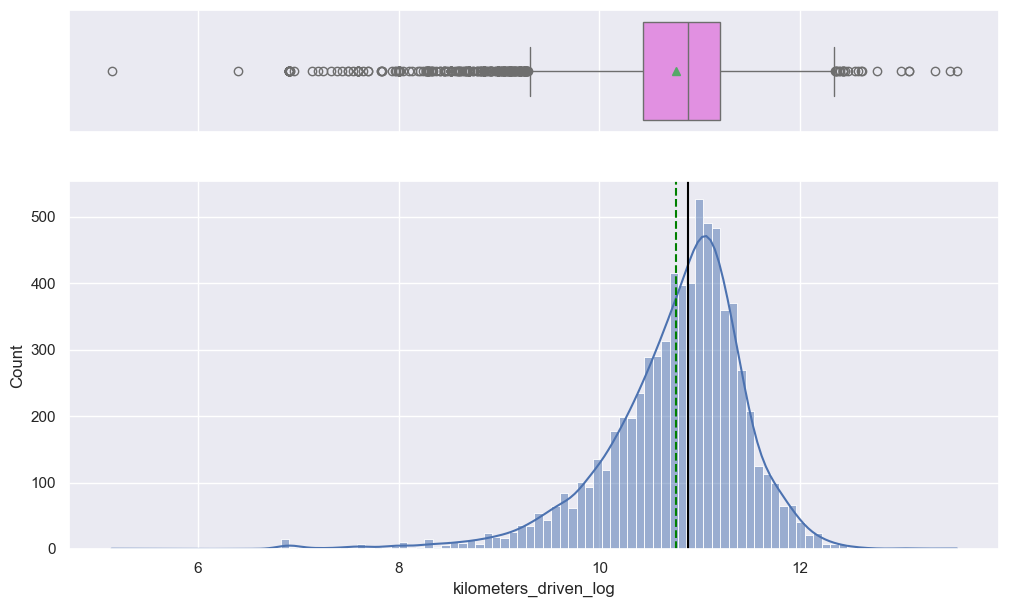

In [205]:
histogram_boxplot(df1, "kilometers_driven_log", bins=100, kde=True)

* Transformation has reduced the extreme skewness.

#### `mileage_num`

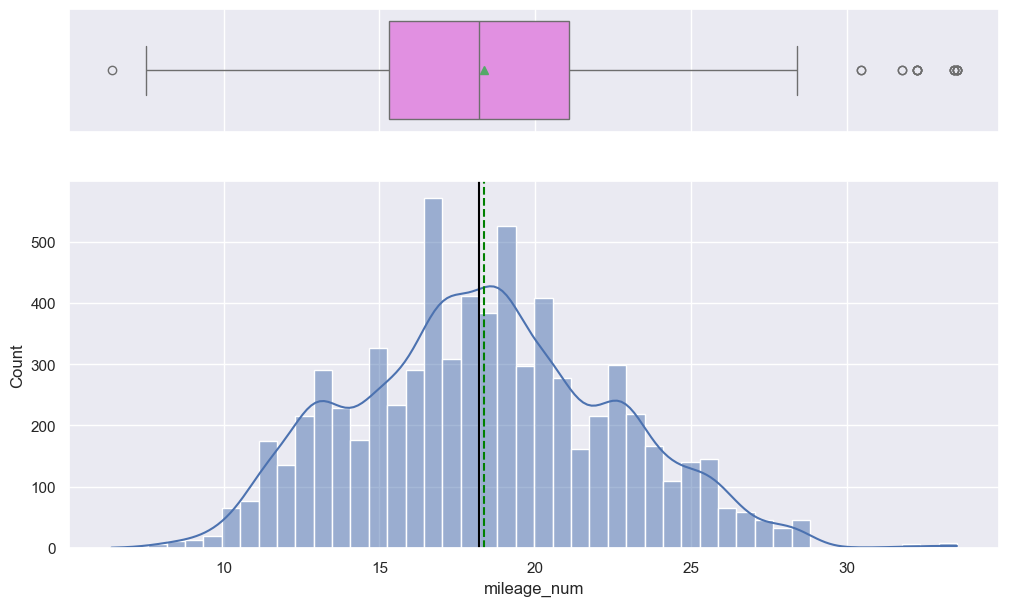

In [202]:
histogram_boxplot(data, "mileage_num", kde=True)

**Observations**

* This is a close to normally distributed attribute.

#### `engine_num`

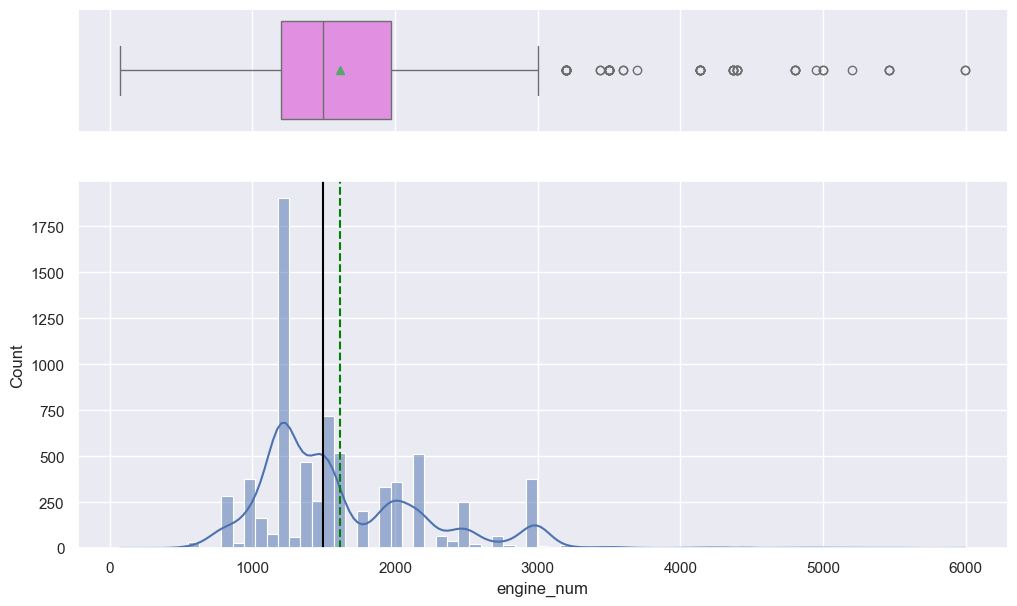

In [201]:
histogram_boxplot(data, "engine_num", kde=True)

**Observations**

* There are a few car with a higher engine displacement volume.

#### `power_num`

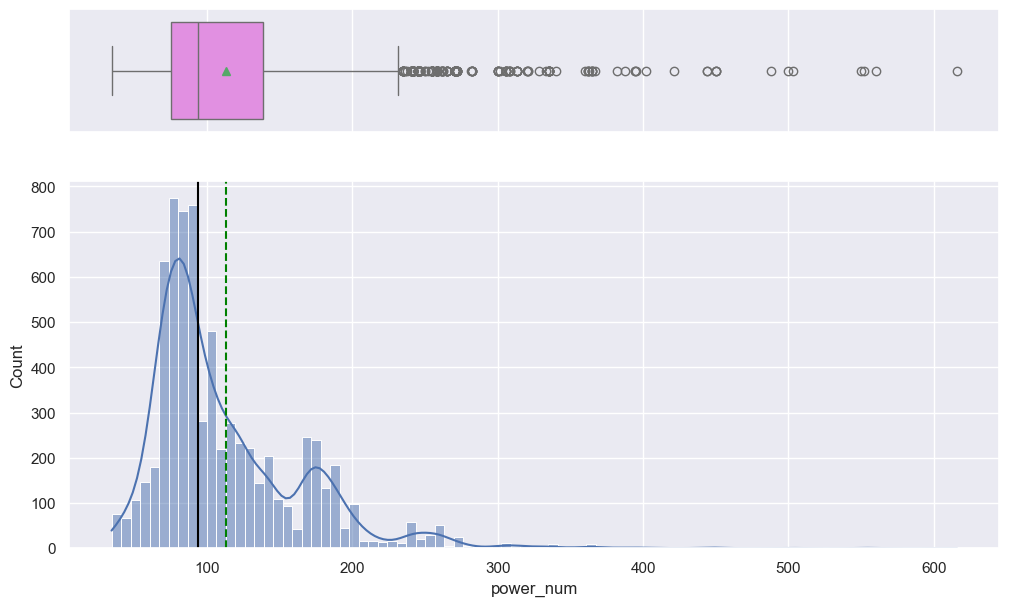

In [200]:
histogram_boxplot(data, "power_num", kde=True)

**Observations**

* There are a few car with a higher engine power.

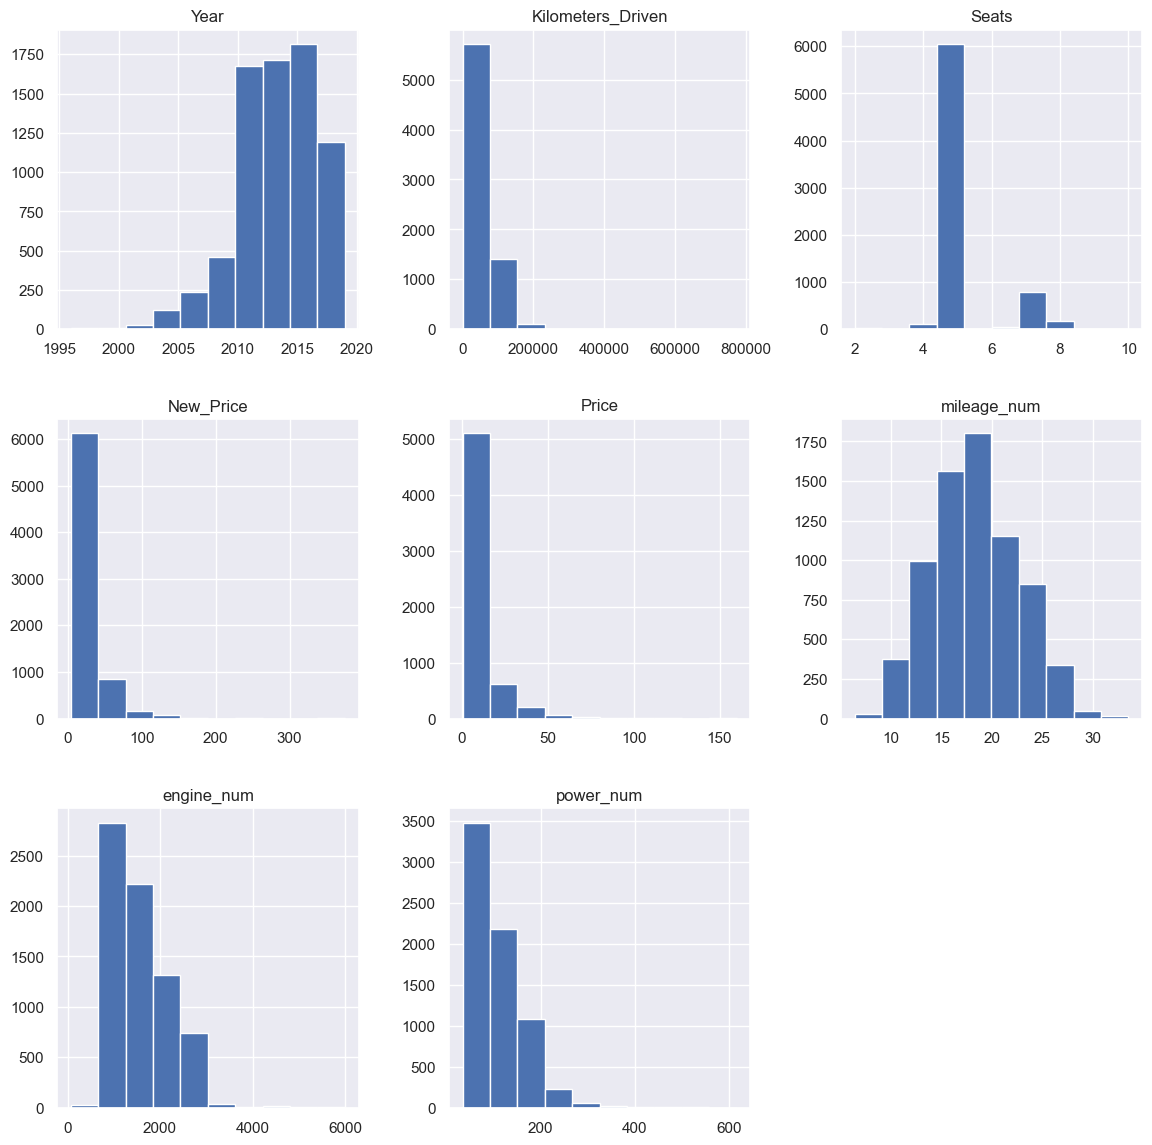

In [199]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

- `Price`: The price of a used car is the target variable and has a highly skewed distribution, with a median value of around 53.5 lakh INR. The log transformation was applied on this column to reduce skewness. The displacement volume of the engine, the maximum power of the engine and the price of a new car of the same model is highly correlated with the price of a used car.
- `Mileage`: This attribute has a close to normally distribution. With increase in mileage, the engine displacement and power decrease.
- `Engine`: There are a few upper outliers, indicating that there are a few car with a higher engine displacement volume. Higher priced cars have higher engine displacement. It is also highly correlated with the maximum engine power.
- `Power`: There are a few upper outliers, indicating that there are a few car with a higher power. Higher priced cars have higher maximum power. It is also highly correlated with the engine displacement volume.
- `Kilometers_driven`: The number of kilometers a used car is driven has a highly skewed distribution, with a median value of around 53.5 thousand. The log transformation was applied on this column to reduce skewness.
- `New_Price`: The price of a used car is the target variable and has a highly skewed distribution, with a median value of around 11.3 lakh INR. The log transformation was applied on this column to reduce skewness.
- `Seats`: 84% of the cars in the dataset are 5-seater cars.
- `Year`: More than half the cars in the data were manufactured in or after 2014. The price of used cars has increased over the years.
- `Brand`: Most of the cars in the data belong to Maruti or Hyundai. The price of used cars is lower for budget brands like Porsche, Bentley, Lamborghini, etc. The price of used cars is higher for premium brands like Maruti, Tata, Fiat, etc.
- `Model`: Maruti Swift is the most common car up for resale. The dataset contains used cars from luxury as well as budget-friendly brands.
- `Location`: Hyderabad and Mumbai have the most demand for used cars. The price of used cars has a large IQR in Coimbatore and Bangalore.
- `Fuel_Type`: Around 1% of the cars in the dataset do not run on diesel or petrol. Electric cars have the highest median price, followed by diesel cars.
- `Transmission`: More than 70% of the cars have manual transmission. The price is higher for used cars with automatic transmission.
- `Owner_Type`: More than 80% of the used cars are being sold for the first time. The price of cars decreases as they keep getting resold.

#### `Model`

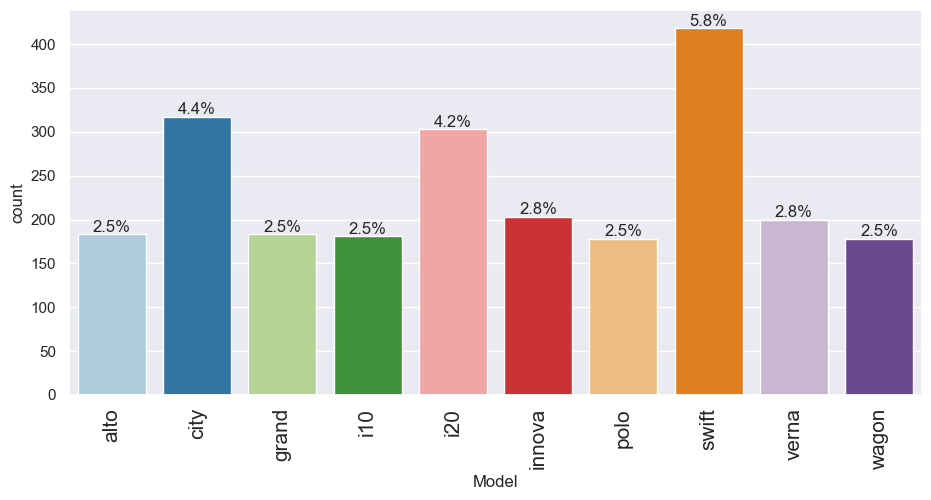

In [206]:
labeled_barplot(data, "Model", perc=True, n=10)

**Observations**

* Maruti Swift is the most common car up for resale.

* It is clear from the above charts that our dataset contains used cars from luxury as well as budget-friendly brands.

* We can create a new variable using this information. We can consider binning all our cars into the following 3 categories later:

    1. Budget-Friendly
    2. Mid Range
    3. Luxury Cars

#### `Seats`

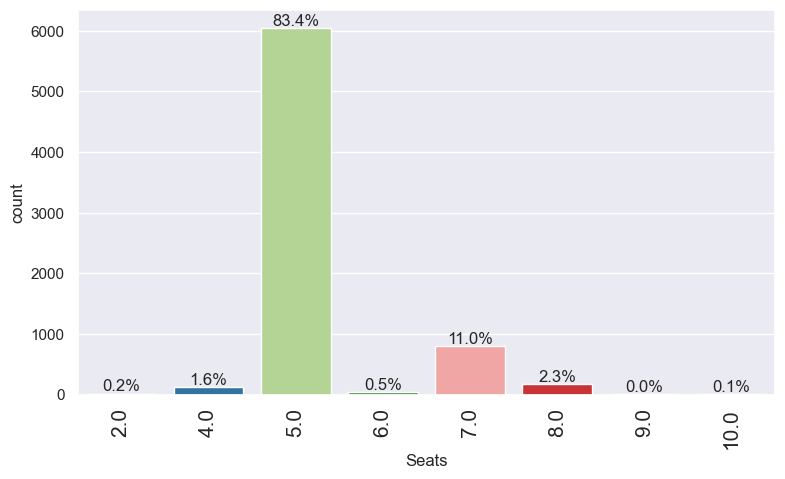

In [207]:
labeled_barplot(data, "Seats", perc=True)

* 84% of the cars in the dataset are 5-seater cars.

#### `Year`

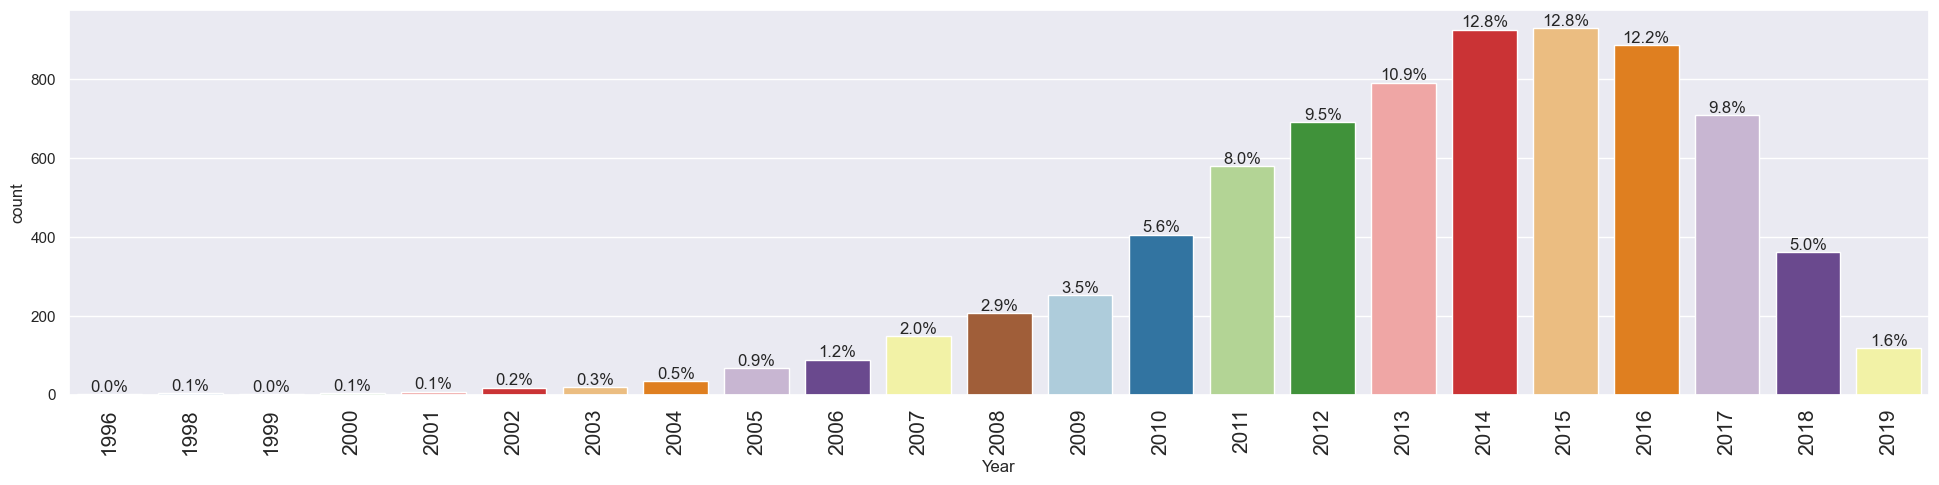

In [208]:
labeled_barplot(data, "Year", perc=True)

* More than half the cars in the data were manufactured in or after 2014.

#### `Transmission`

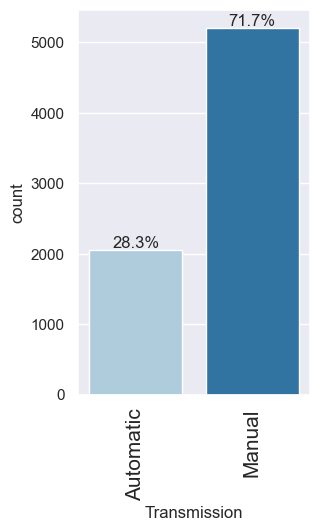

In [209]:
labeled_barplot(data, "Transmission", perc=True)

* More than 70% of the cars have manual transmission.

#### `Owner_Type`

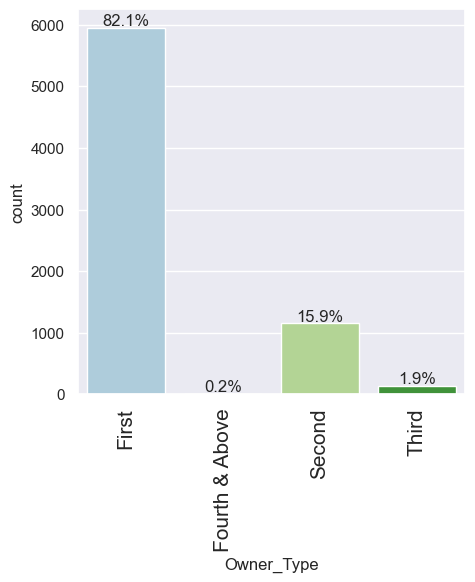

In [210]:
labeled_barplot(data, "Owner_Type", perc=True)

* More than 80% of the used cars are being sold for the first time.

### Bivariate Analysis

**Let's check the variation in Price with some of the other variables.**

#### `Price` vs `Transmission`

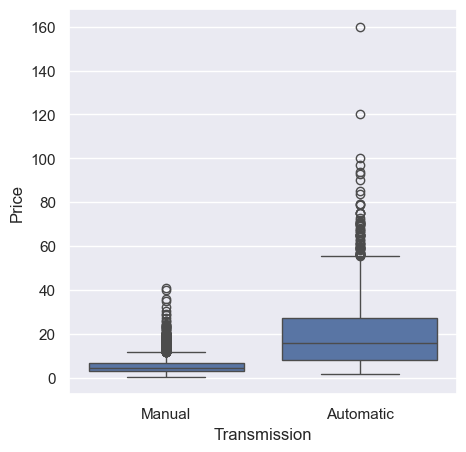

In [211]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Transmission", y="Price", data=data)
plt.show()

* The price is higher for used cars with automatic transmission.

#### `Price` vs `Fuel_Type`

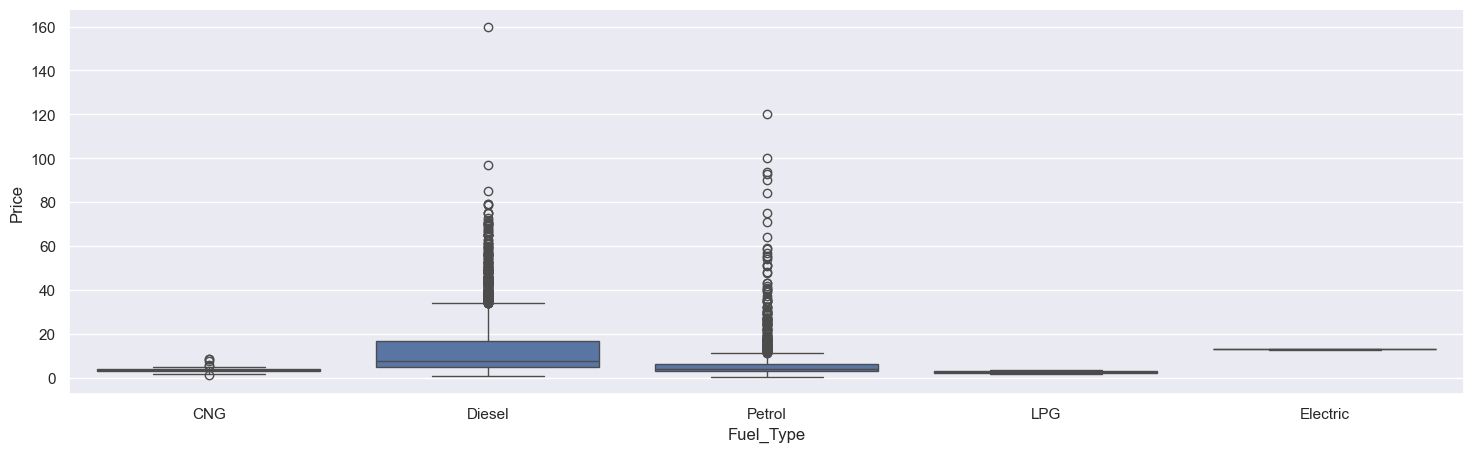

In [212]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=data)
plt.show()

* Electric cars have the highest median price, followed by diesel cars.

#### `Price` vs `Brand`

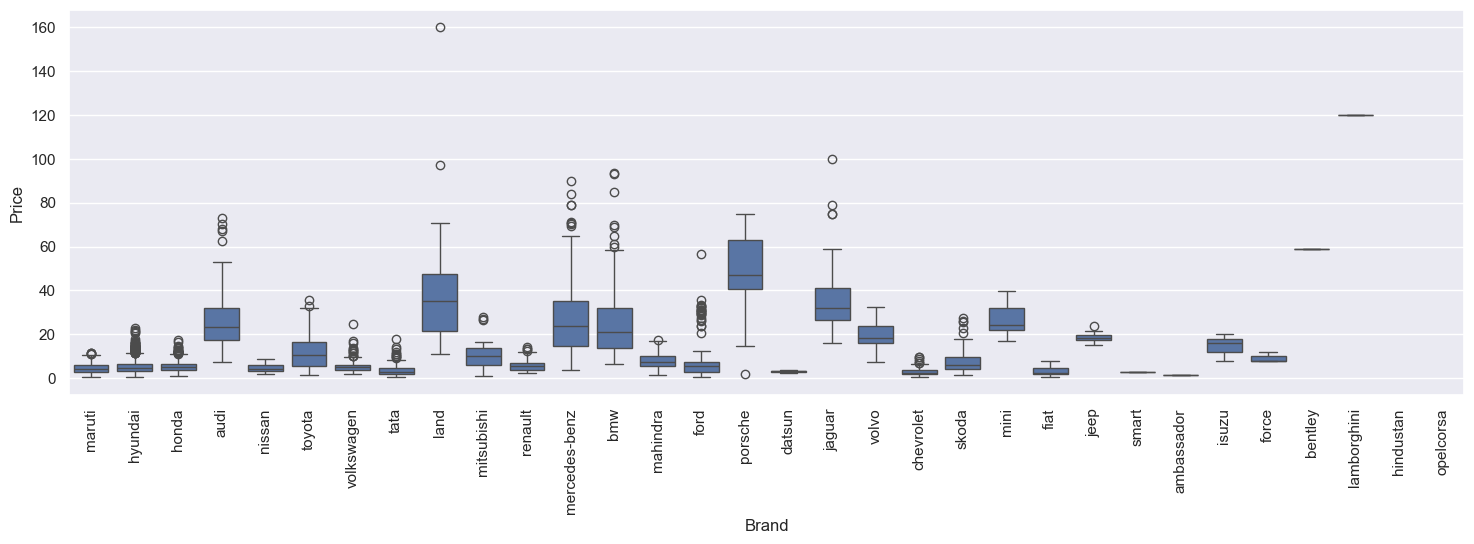

In [213]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Brand", y="Price", data=data)
plt.xticks(rotation=90)
plt.show()

* The price of used cars is lower for budget brands like Maruti, Tata, Fiat, etc.
* The price of used cars is higher for premium brands like Porsche, Audi, Lamborghini, etc.

#### `Price` vs `Transmission`

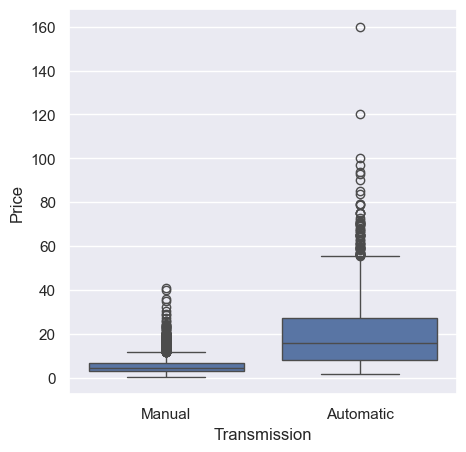

In [214]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Transmission", y="Price", data=data)
plt.show()

* The price is higher for used cars with automatic transmission.

#### `Price` vs `Fuel_Type`

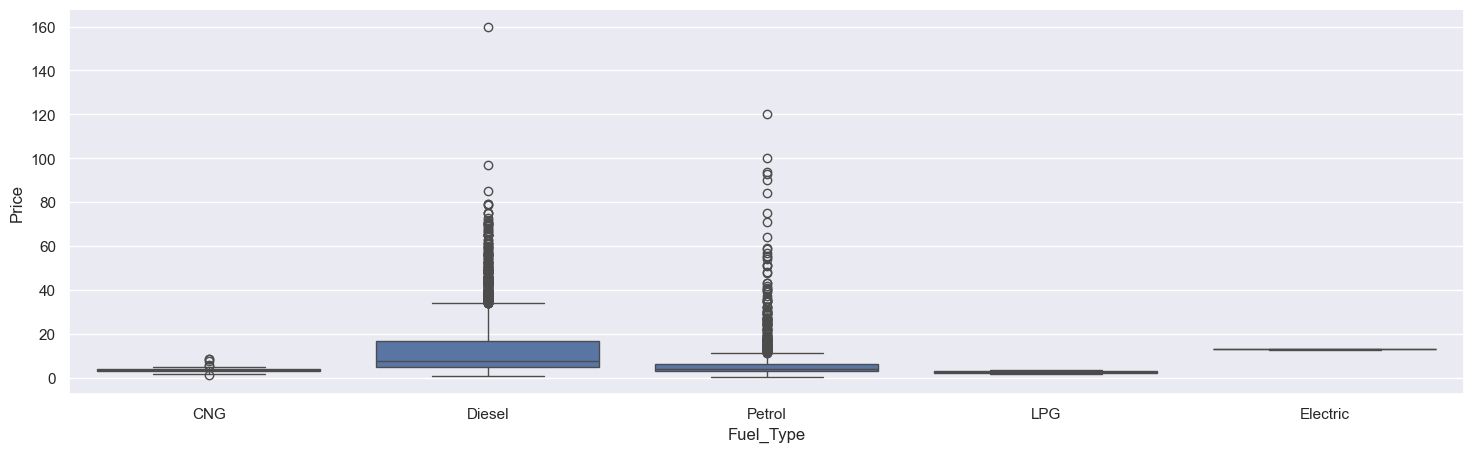

In [215]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=data)
plt.show()

* Electric cars have the highest median price, followed by diesel cars.

#### `Price` vs `Owner_Type`

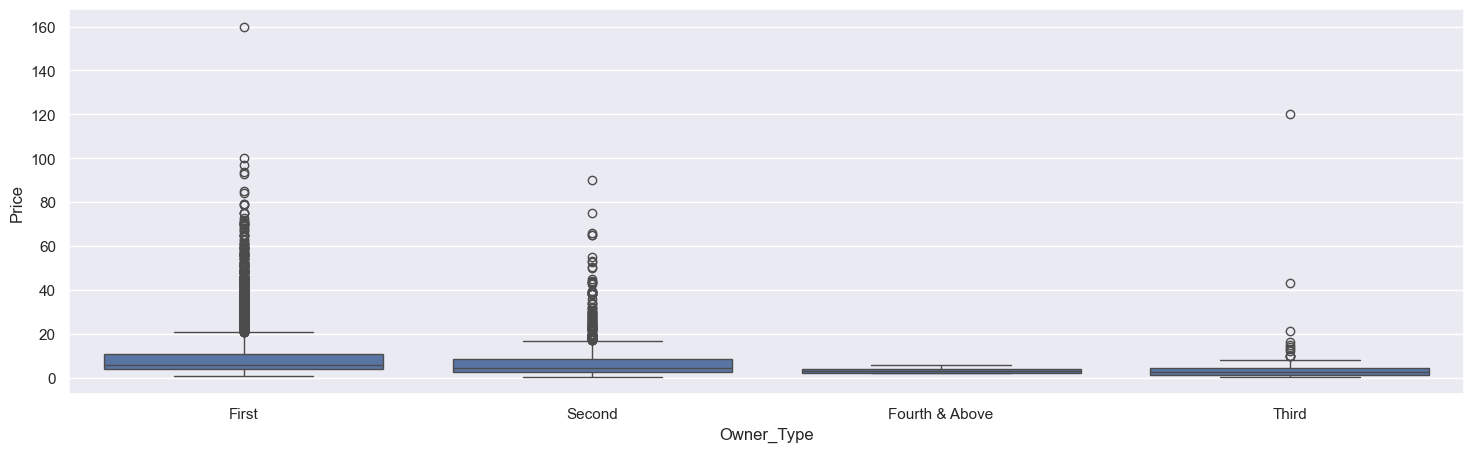

In [216]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Owner_Type", y="Price", data=data)
plt.show()

* The price of cars decreases as they keep getting resold.

#### Pairplot for relations between numerical variables

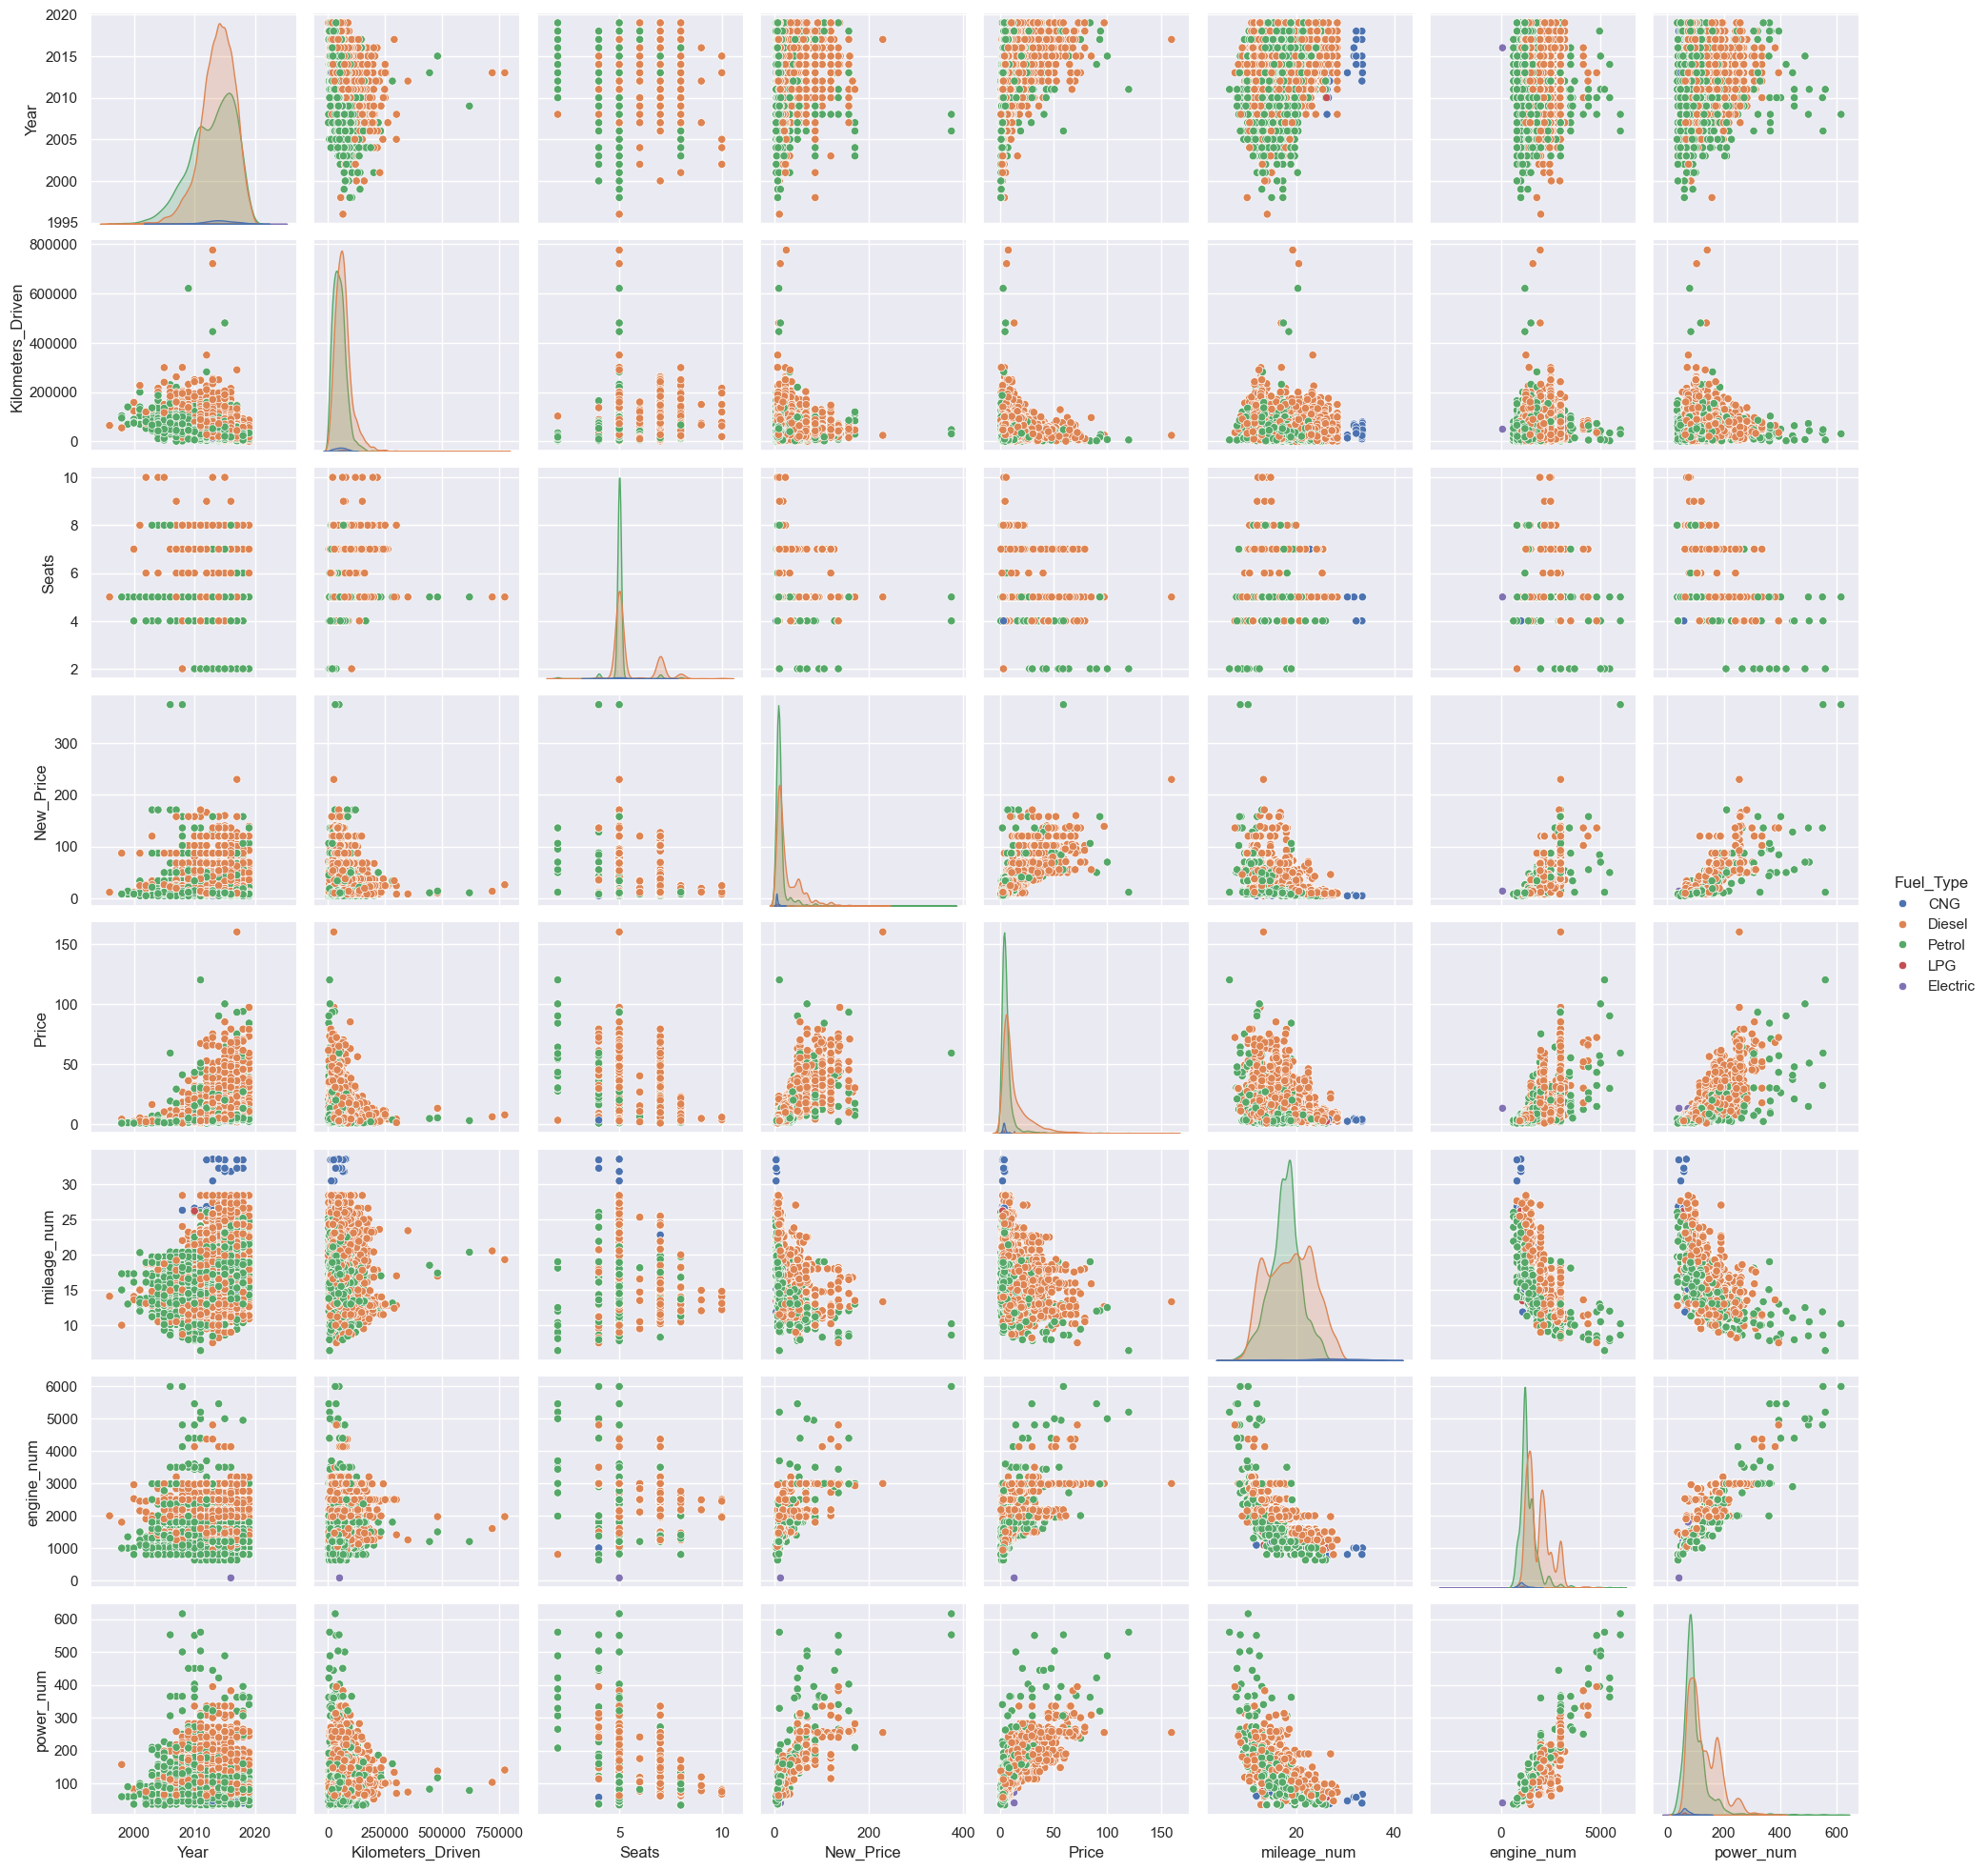

In [217]:
sns.pairplot(data=data, hue="Fuel_Type")
plt.show()


Zooming into these plots gives us a lot of information.

- Contrary to intuition, `Kilometers_Driven` does not seem to have a relationship with the price.
- `Price` has a positive relationship with `Year`, i.e., the newer the car, the higher the price.
    - The temporal element of variation is captured in the year column.

- 2 seater cars are all luxury variants. Cars with 8-10 seats are exclusively mid to high range.
- Mileage does not seem to show much relationship with the price of used cars.
- Engine displacement and power of the car have a positive relationship with the price.
- `New_Price` and used car price are also positively correlated, which is expected.
- `Kilometers_Driven` has a peculiar relationship with the `Year` variable. Generally, the newer the car lesser the distance it has traveled, but this is not always true.
- CNG cars are conspicuous outliers when it comes to `Mileage`. The mileage of these cars is very high.
- The mileage and power of newer cars are increasing owing to advancements in technology.
- Mileage has a negative correlation with engine displacement and power. More powerful the engine, the more fuel it consumes in general.

### To jump back to the EDA summary section, click <a href = #link2>here</a>.